#                                             Fraud Detection      

### Problem Statement

Automobile insurance companies face the challenge of identifying and managing fraudulent insurance claims. Fraudulent claims take various forms, such as staged accidents, false injury claims, or inflated damage assessments. Detecting these claims manually can be time-consuming, error-prone, and costly. By implementing a predictive Machine Learning model, we aim to automate the process of flagging potentially fraudulent claims, which will significantly enhance the efficiency and accuracy of claim processing.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv(r'insurance_claims.csv')

In [18]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [19]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[5 rows x 39 columns]

In [20]:
df.shape

(1000, 39)

In [21]:
# checking the columns present in the dataframe
df.columns.to_list()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [22]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [23]:
#This method prints information about the DataFrame including the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### Missing value check

In [24]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

** Observation **
- There is no missing values present in the dataset.

In [25]:
#number of unique values in our data
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [26]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

#### Checking the unique values of each columns

In [27]:
# cheking for months_as_customer
df['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

In [28]:
df['months_as_customer'].value_counts(normalize=True)*100

194    0.8
128    0.7
254    0.7
140    0.7
210    0.7
      ... 
390    0.1
411    0.1
453    0.1
448    0.1
17     0.1
Name: months_as_customer, Length: 391, dtype: float64

In [29]:
df['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22])

In [30]:
df['age'].value_counts(normalize=True)*100

43    4.9
39    4.8
41    4.5
34    4.4
38    4.2
30    4.2
31    4.2
37    4.1
33    3.9
40    3.8
32    3.8
29    3.5
46    3.3
42    3.2
35    3.2
36    3.2
44    3.2
28    3.0
26    2.6
45    2.6
48    2.5
47    2.4
27    2.4
57    1.6
25    1.4
55    1.4
49    1.4
53    1.3
50    1.3
24    1.0
54    1.0
61    1.0
51    0.9
60    0.9
58    0.8
56    0.8
23    0.7
21    0.6
59    0.5
62    0.4
52    0.4
64    0.2
63    0.2
19    0.1
20    0.1
22    0.1
Name: age, dtype: float64

In [31]:
# policy_state
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [32]:
df['policy_state'].value_counts(normalize=True)*100

OH    35.2
IL    33.8
IN    31.0
Name: policy_state, dtype: float64

In [33]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [34]:
df['policy_csl'].value_counts(normalize=True)*100

250/500     35.1
100/300     34.9
500/1000    30.0
Name: policy_csl, dtype: float64

In [35]:
# policy_deductable
df['policy_deductable'].unique()

array([1000, 2000,  500])

In [36]:
df['policy_deductable'].value_counts(normalize=True)*100

1000    35.1
500     34.2
2000    30.7
Name: policy_deductable, dtype: float64

In [37]:
# umbrella_limit
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000])

In [38]:
df['umbrella_limit'].value_counts(normalize=True)*100

 0           79.8
 6000000      5.7
 5000000      4.6
 4000000      3.9
 7000000      2.9
 3000000      1.2
 8000000      0.8
 9000000      0.5
 2000000      0.3
 10000000     0.2
-1000000      0.1
Name: umbrella_limit, dtype: float64

In [39]:
# insured_education_level
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [40]:
df['insured_education_level'].value_counts(normalize=True)*100

JD             16.1
High School    16.0
Associate      14.5
MD             14.4
Masters        14.3
PhD            12.5
College        12.2
Name: insured_education_level, dtype: float64

In [41]:
# insured_occupation
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [42]:
df['insured_occupation'].value_counts(normalize=True)*100

machine-op-inspct    9.3
prof-specialty       8.5
tech-support         7.8
sales                7.6
exec-managerial      7.6
craft-repair         7.4
transport-moving     7.2
other-service        7.1
priv-house-serv      7.1
armed-forces         6.9
adm-clerical         6.5
protective-serv      6.3
handlers-cleaners    5.4
farming-fishing      5.3
Name: insured_occupation, dtype: float64

In [43]:
#insured_hobbies
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [44]:
df['insured_hobbies'].value_counts(normalize=True)*100

reading           6.4
exercise          5.7
paintball         5.7
bungie-jumping    5.6
movies            5.5
golf              5.5
camping           5.5
kayaking          5.4
yachting          5.3
hiking            5.2
video-games       5.0
skydiving         4.9
base-jumping      4.9
board-games       4.8
polo              4.7
chess             4.6
dancing           4.3
sleeping          4.1
cross-fit         3.5
basketball        3.4
Name: insured_hobbies, dtype: float64

In [45]:
# insured_relationship
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [46]:
df['insured_relationship'].value_counts(normalize=True)*100

own-child         18.3
other-relative    17.7
not-in-family     17.4
husband           17.0
wife              15.5
unmarried         14.1
Name: insured_relationship, dtype: float64

In [47]:
#incident_type
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [48]:
df['incident_type'].value_counts(normalize=True)*100

Multi-vehicle Collision     41.9
Single Vehicle Collision    40.3
Vehicle Theft                9.4
Parked Car                   8.4
Name: incident_type, dtype: float64

In [49]:
#incident_severity
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [50]:
df['incident_severity'].value_counts(normalize=True)*100

Minor Damage      35.4
Total Loss        28.0
Major Damage      27.6
Trivial Damage     9.0
Name: incident_severity, dtype: float64

In [51]:
#collision_type
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [52]:
df['collision_type'].value_counts(normalize=True)*100

Rear Collision     29.2
Side Collision     27.6
Front Collision    25.4
?                  17.8
Name: collision_type, dtype: float64

In [53]:
#authorities_contacted
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [54]:
df['authorities_contacted'].value_counts(normalize=True)*100

Police       29.2
Fire         22.3
Other        19.8
Ambulance    19.6
None          9.1
Name: authorities_contacted, dtype: float64

In [55]:
#incident_state
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [56]:
df['incident_state'].value_counts(normalize=True)*100

NY    26.2
SC    24.8
WV    21.7
VA    11.0
NC    11.0
PA     3.0
OH     2.3
Name: incident_state, dtype: float64

In [57]:
#incident_city
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [58]:
df['incident_city'].value_counts(normalize=True)*100

Springfield    15.7
Arlington      15.2
Columbus       14.9
Northbend      14.5
Hillsdale      14.1
Riverwood      13.4
Northbrook     12.2
Name: incident_city, dtype: float64

In [59]:
# number_of_vehicles_involved
df['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2])

In [60]:
df['number_of_vehicles_involved'].value_counts(normalize=True)*100

1    58.1
3    35.8
4     3.1
2     3.0
Name: number_of_vehicles_involved, dtype: float64

In [61]:
#property_damage
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [62]:
df['property_damage'].value_counts(normalize=True)*100

?      36.0
NO     33.8
YES    30.2
Name: property_damage, dtype: float64

In [63]:
#bodily_injuries
df['bodily_injuries'].unique()

array([1, 0, 2])

In [64]:
df['bodily_injuries'].value_counts(normalize=True)*100

0    34.0
2    33.2
1    32.8
Name: bodily_injuries, dtype: float64

In [65]:
#witnesses
df['witnesses'].unique()

array([2, 0, 3, 1])

In [66]:
df['witnesses'].value_counts(normalize=True)*100

1    25.8
2    25.0
0    24.9
3    24.3
Name: witnesses, dtype: float64

In [67]:
#police_report_available
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [68]:
df['police_report_available'].value_counts(normalize=True)*100

?      34.3
NO     34.3
YES    31.4
Name: police_report_available, dtype: float64

In [69]:
#auto_make
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [70]:
df['auto_make'].value_counts(normalize=True)*100

Saab          8.0
Dodge         8.0
Suburu        8.0
Nissan        7.8
Chevrolet     7.6
Ford          7.2
BMW           7.2
Toyota        7.0
Audi          6.9
Accura        6.8
Volkswagen    6.8
Jeep          6.7
Mercedes      6.5
Honda         5.5
Name: auto_make, dtype: float64

In [71]:
#auto_model 
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [72]:
df['auto_model'].value_counts(normalize=True)*100

RAM               4.3
Wrangler          4.2
A3                3.7
Neon              3.7
MDX               3.6
Jetta             3.5
Passat            3.3
A5                3.2
Legacy            3.2
Pathfinder        3.1
Malibu            3.0
92x               2.8
Camry             2.8
Forrestor         2.8
F150              2.7
95                2.7
E400              2.7
93                2.5
Grand Cherokee    2.5
Escape            2.4
Tahoe             2.4
Maxima            2.4
Ultima            2.3
X5                2.3
Highlander        2.2
Civic             2.2
Silverado         2.2
Fusion            2.1
ML350             2.0
Impreza           2.0
Corolla           2.0
TL                2.0
CRV               2.0
C300              1.8
3 Series          1.8
X6                1.6
M5                1.5
Accord            1.3
RSX               1.2
Name: auto_model, dtype: float64

In [73]:
#auto_year
df['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013])

In [74]:
df['auto_year'].value_counts(normalize=True)*100

1995    5.6
1999    5.5
2005    5.4
2006    5.3
2011    5.3
2007    5.2
2003    5.1
2009    5.0
2010    5.0
2013    4.9
2002    4.9
2015    4.7
1997    4.6
2012    4.6
2008    4.5
2014    4.4
2001    4.2
2000    4.2
1998    4.0
2004    3.9
1996    3.7
Name: auto_year, dtype: float64

In [75]:
#fraud_reported
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [76]:
df['fraud_reported'].value_counts(normalize=True)*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

In [77]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

#### wrong value handling

In [78]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


In [79]:
df['collision_type'] = df['collision_type'].replace(['?'],df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].replace(['?'],df[df['property_damage']!='?']['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].replace(['?'],df[df['police_report_available']!='?']['police_report_available'].mode()[0])

In [80]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                         0
policy_bind_date         0
policy_state             0
policy_csl               0
insured_sex              0
insured_education_level  0
insured_occupation       0
insured_hobbies          0
insured_relationship     0
incident_date            0
incident_type            0
collision_type           0
incident_severity        0
authorities_contacted    0
incident_state           0
incident_city            0
incident_location        0
property_damage          0
police_report_available  0
auto_make                0
auto_model               0
fraud_reported           0


#### Datatype conversion

In [81]:
#### as we can see there are two date variables which contains date we should convert them to date datatype.
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [82]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

#### Outlier detection of numerical variable and treatment

In [83]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

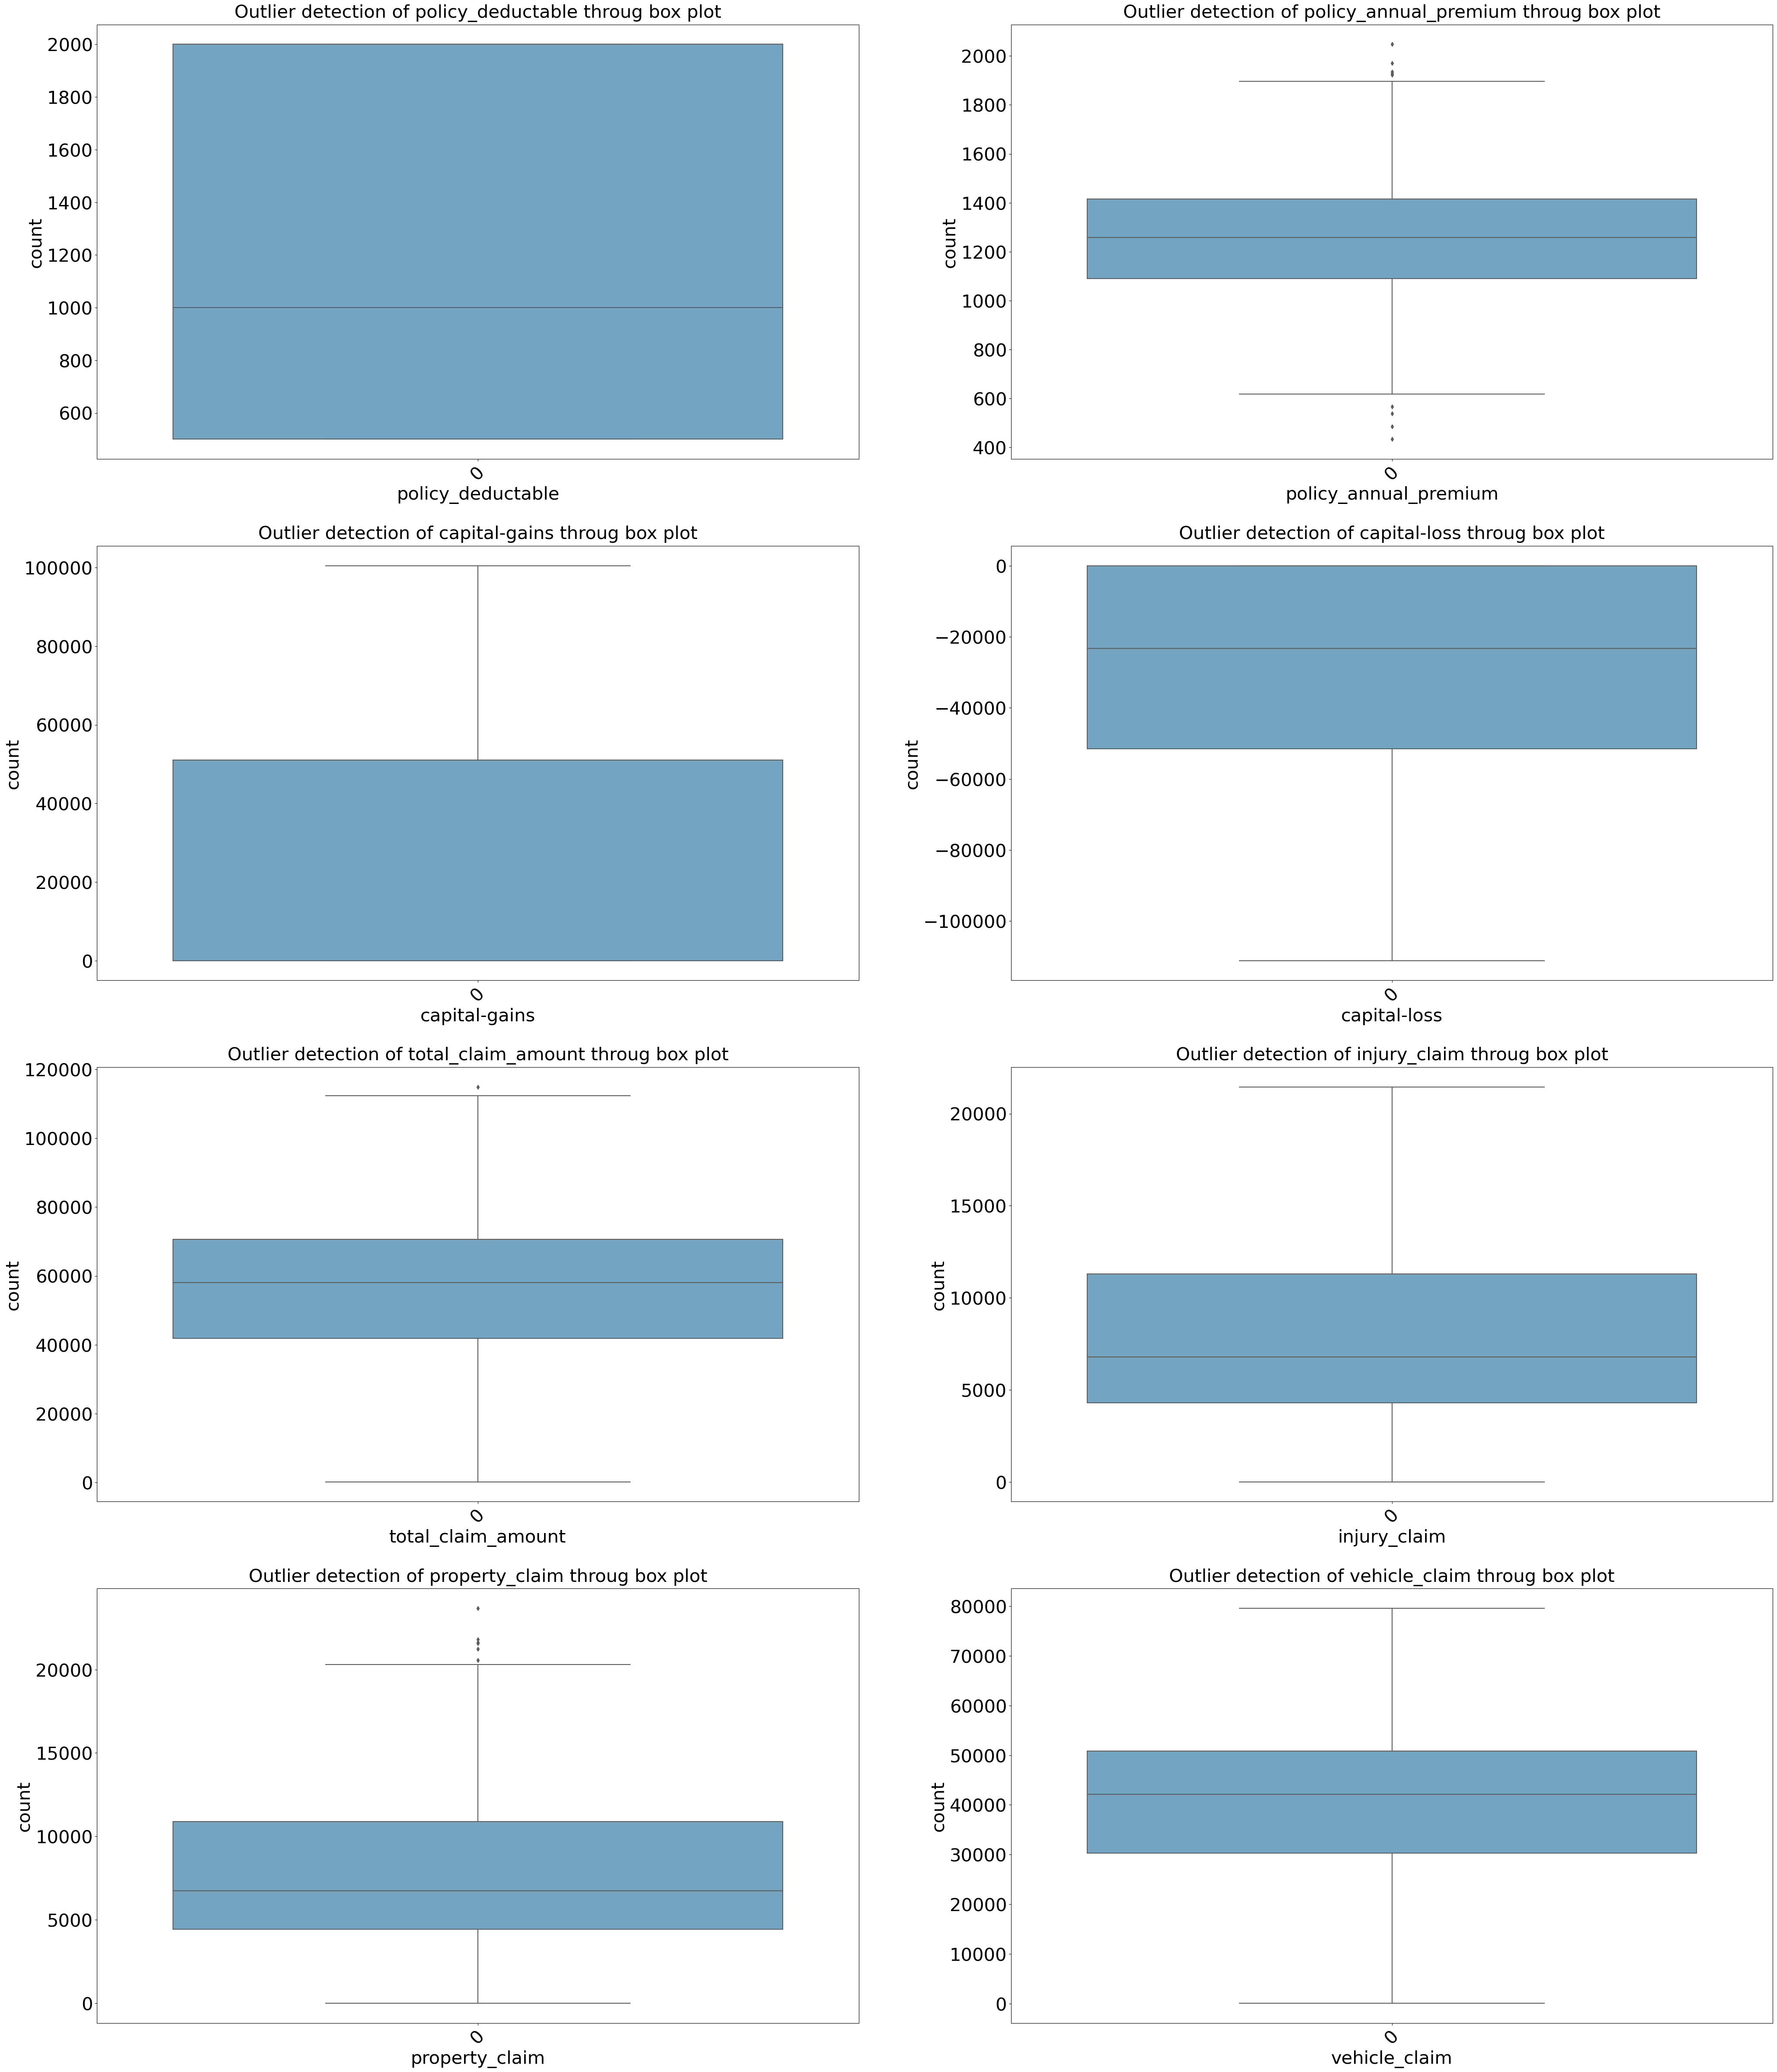

In [84]:
# understanding the distribution for numerical variables
cols = ['policy_deductable', 'policy_annual_premium' , 'capital-gains', 'capital-loss','total_claim_amount',
       'injury_claim','property_claim','vehicle_claim']

fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(50,60))

index = 0
for row in range(4):
    for col in range(2):
        sns.boxplot(df[cols[index]], ax=axis[row, col],palette='PuBuGn')
        axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45,fontsize=30)
        axis[row, col].set_yticklabels(axis[row, col].get_yticklabels(),fontsize=30)
        axis[row, col].set_xlabel(f"{cols[index]}",fontsize=30)
        axis[row, col].set_ylabel("count",fontsize=30)
        axis[row,col].set_title(f"Outlier detection of {cols[index]} throug box plot", pad=12, fontsize=30)
        index += 1

plt.show()

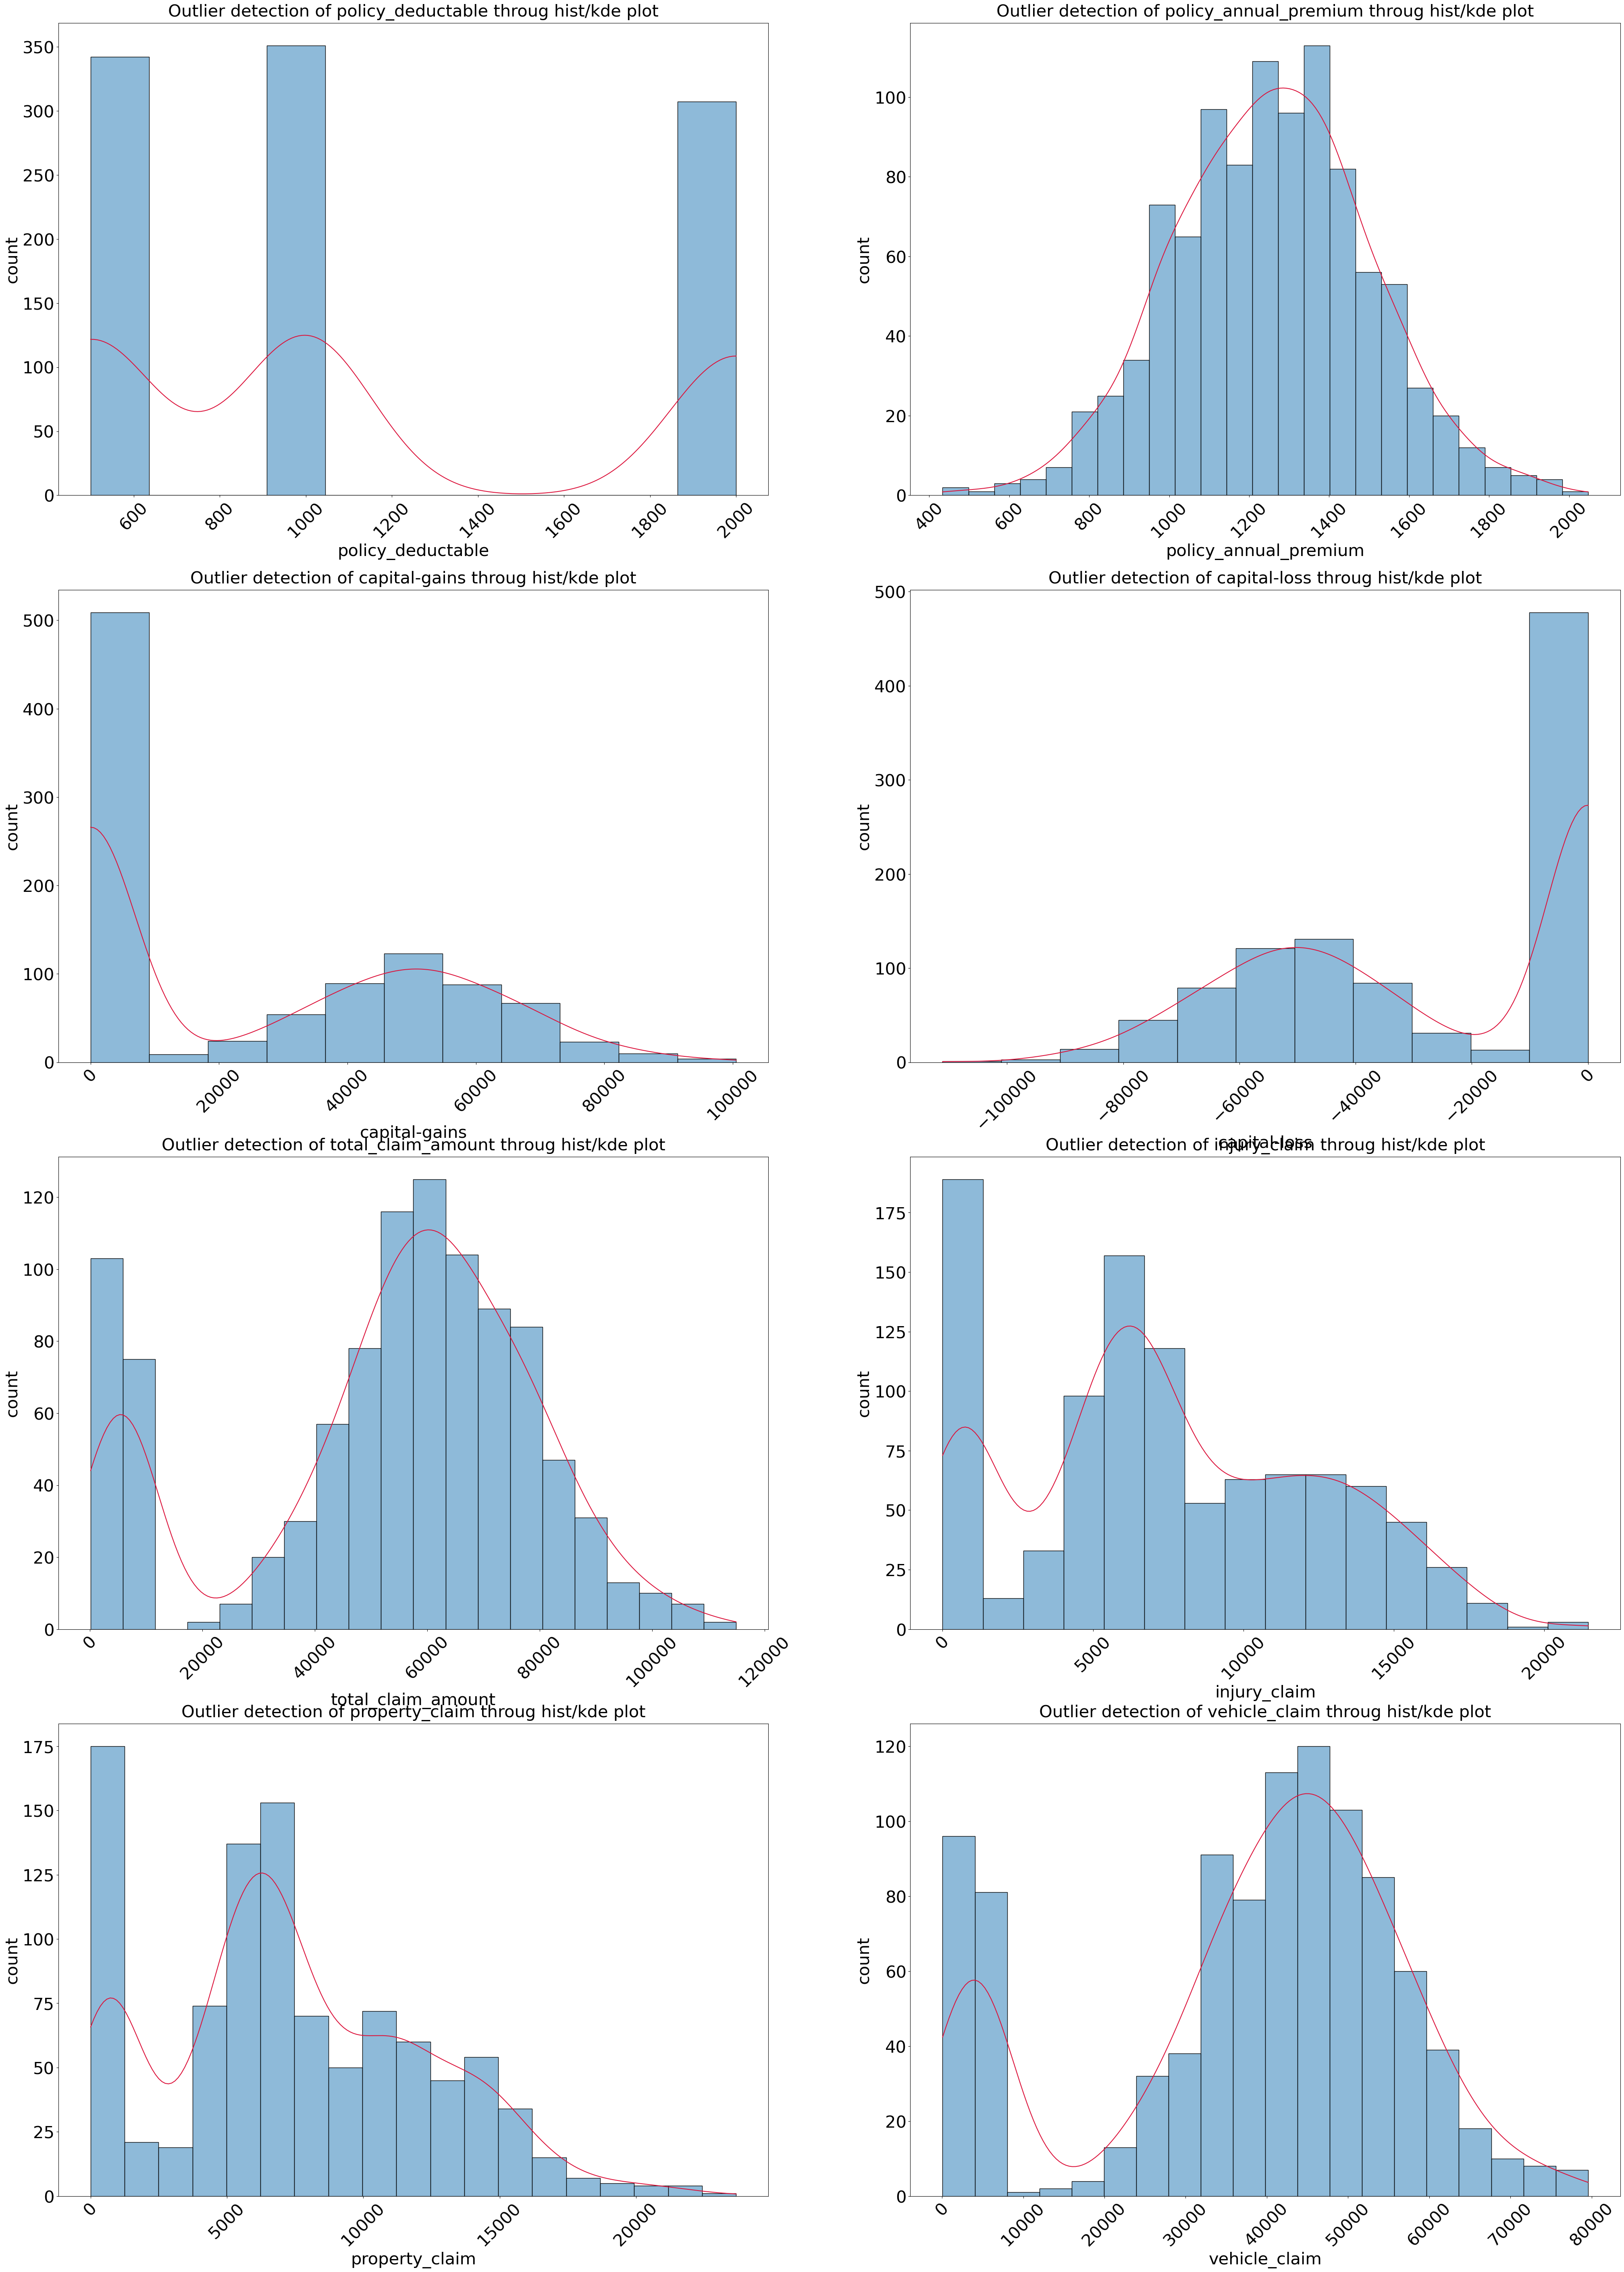

In [85]:
# understanding the distribution for numerical variables
cols = ['policy_deductable', 'policy_annual_premium' , 'capital-gains', 'capital-loss','total_claim_amount',
       'injury_claim','property_claim','vehicle_claim']

fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(50,70))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(df[cols[index]], ax=axis[row, col], kde=True)
        axis[row, col].lines[0].set_color('crimson')
        axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45,fontsize=30)
        axis[row, col].set_yticklabels(axis[row, col].get_yticklabels(),fontsize=30)
        axis[row,col].set_title(f"Outlier detection of {cols[index]} throug hist/kde plot", pad=12, fontsize=30)
        axis[row, col].set_xlabel(f"{cols[index]}",fontsize=30)
        axis[row, col].set_ylabel("count",fontsize=30)
        index += 1

plt.show()

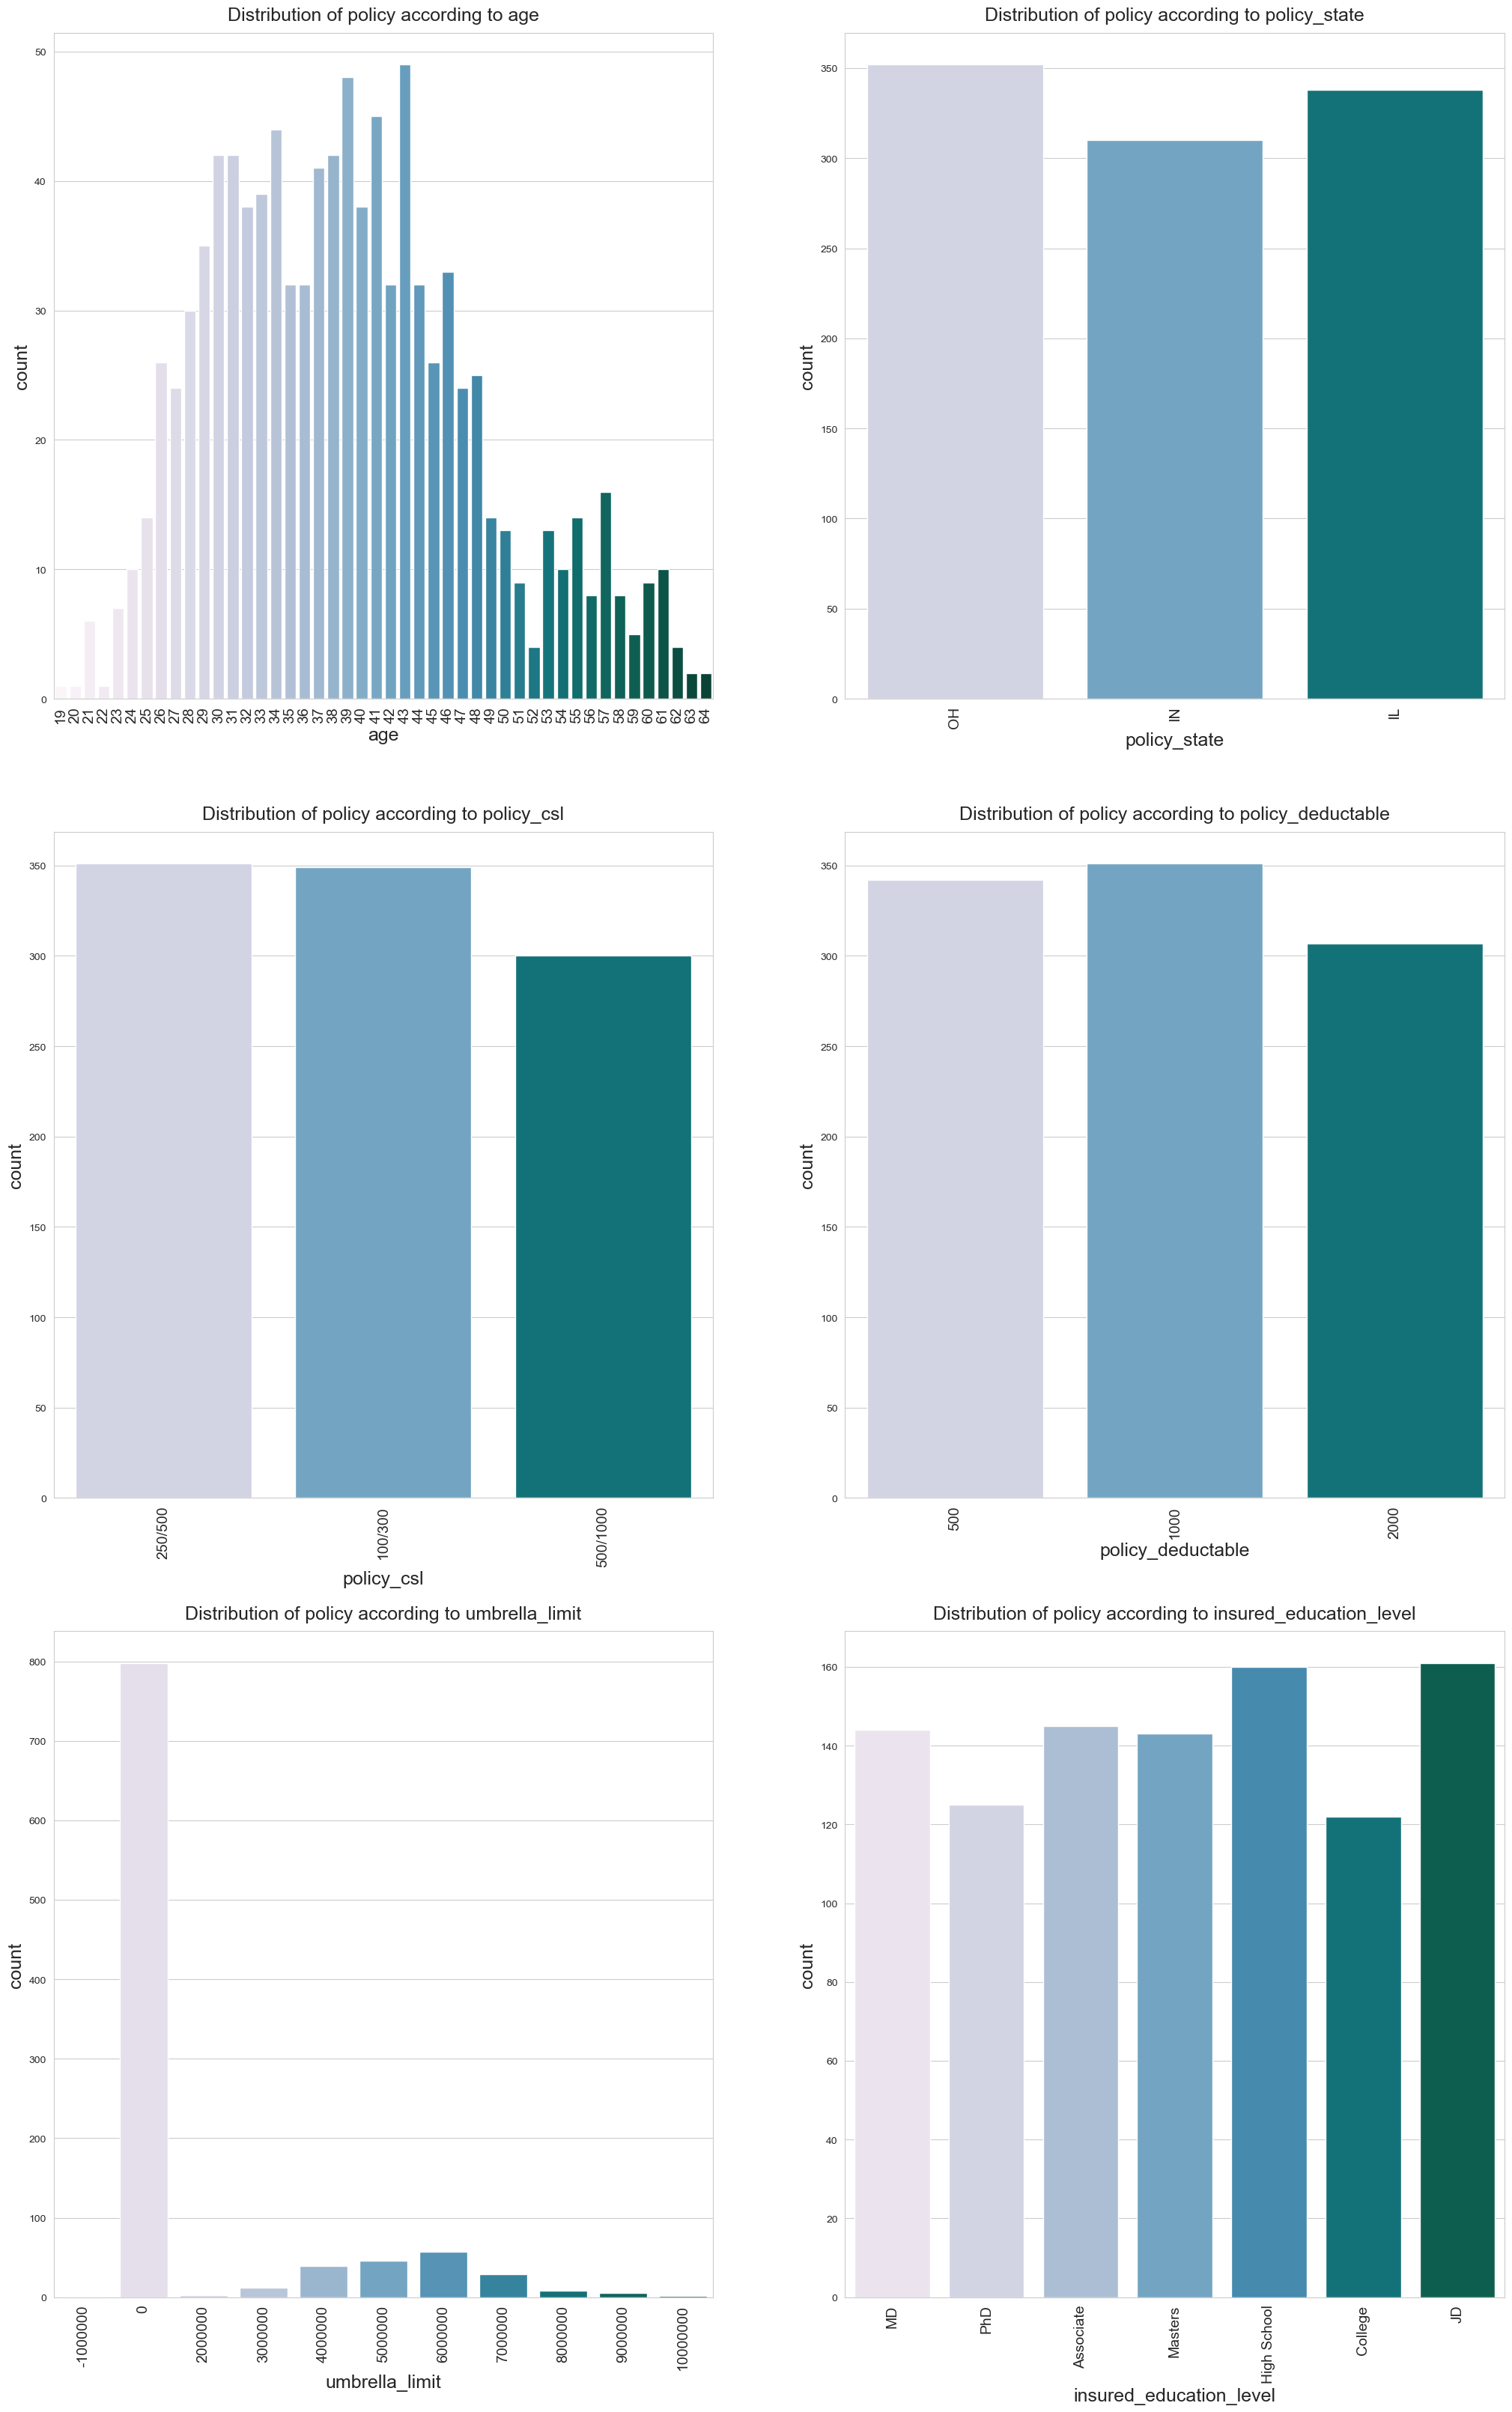

In [86]:
sns.set_style(style='whitegrid')
attributes = ['age', 'policy_state','policy_csl','policy_deductable','umbrella_limit','insured_education_level']
fig, axis = plt.subplots(3,2,figsize=(25, 16))
fig.subplots_adjust(top=2.0)
count=0
for i in range(3):
    for j in range(2):
        sns.countplot(data=df,x=attributes[count],ax=axis[i,j],palette='PuBuGn')
        axis[i,j].set_title(f"Distribution of policy according to {attributes[count]}", pad=12, fontsize=18)
        axis[i,j].set_xticklabels(axis[i,j].get_xticklabels(), rotation=90,fontsize=14)
        axis[i,j].set_xlabel(f"{attributes[count]}",fontsize=18)
        axis[i,j].set_ylabel("count",fontsize=18)
        count += 1
plt.show()

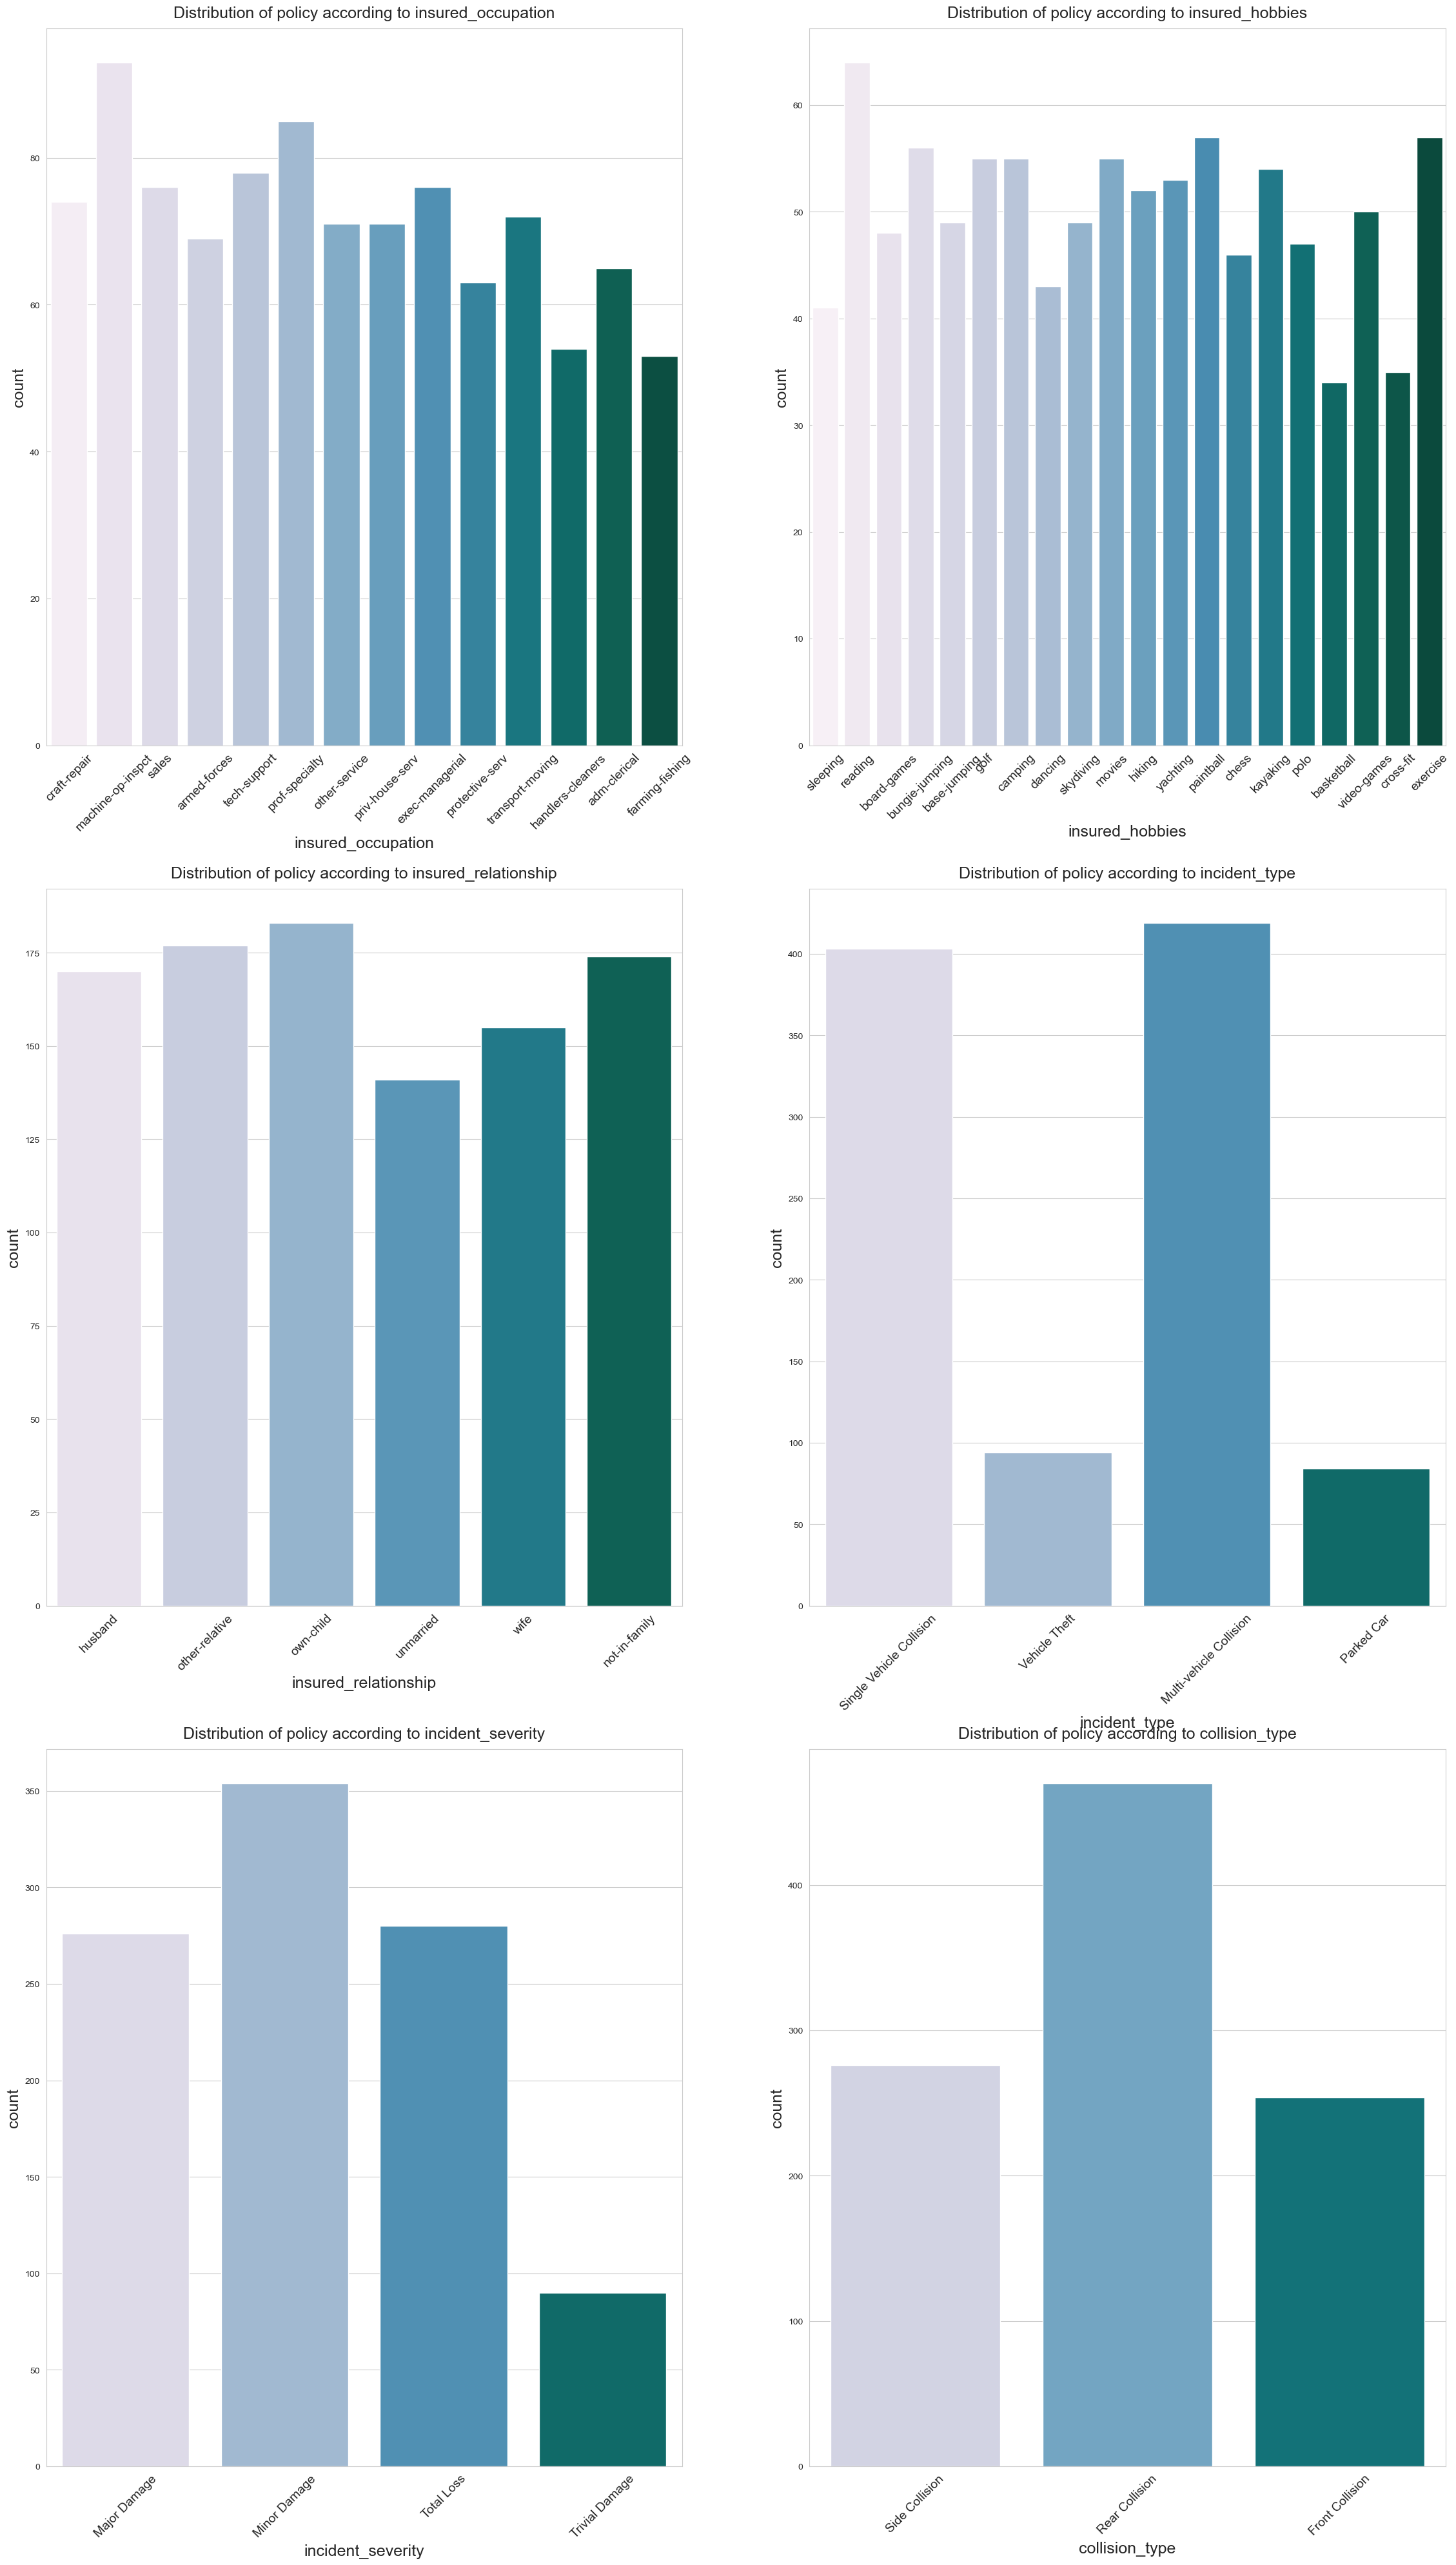

In [87]:
sns.set_style(style='whitegrid')
attributes = ['insured_occupation', 'insured_hobbies','insured_relationship','incident_type','incident_severity','collision_type']
fig, axis = plt.subplots(3,2,figsize=(28, 20))
fig.subplots_adjust(top=2.0)
count=0
for i in range(3):
    for j in range(2):
        sns.countplot(data=df,x=attributes[count],ax=axis[i,j],palette='PuBuGn')
        axis[i,j].set_title(f"Distribution of policy according to {attributes[count]}", pad=12, fontsize=18)
        axis[i,j].set_xticklabels(axis[i,j].get_xticklabels(), rotation=45,fontsize=14)
        axis[i,j].set_xlabel(f"{attributes[count]}",fontsize=18)
        axis[i,j].set_ylabel("count",fontsize=18)
        count += 1
plt.show()

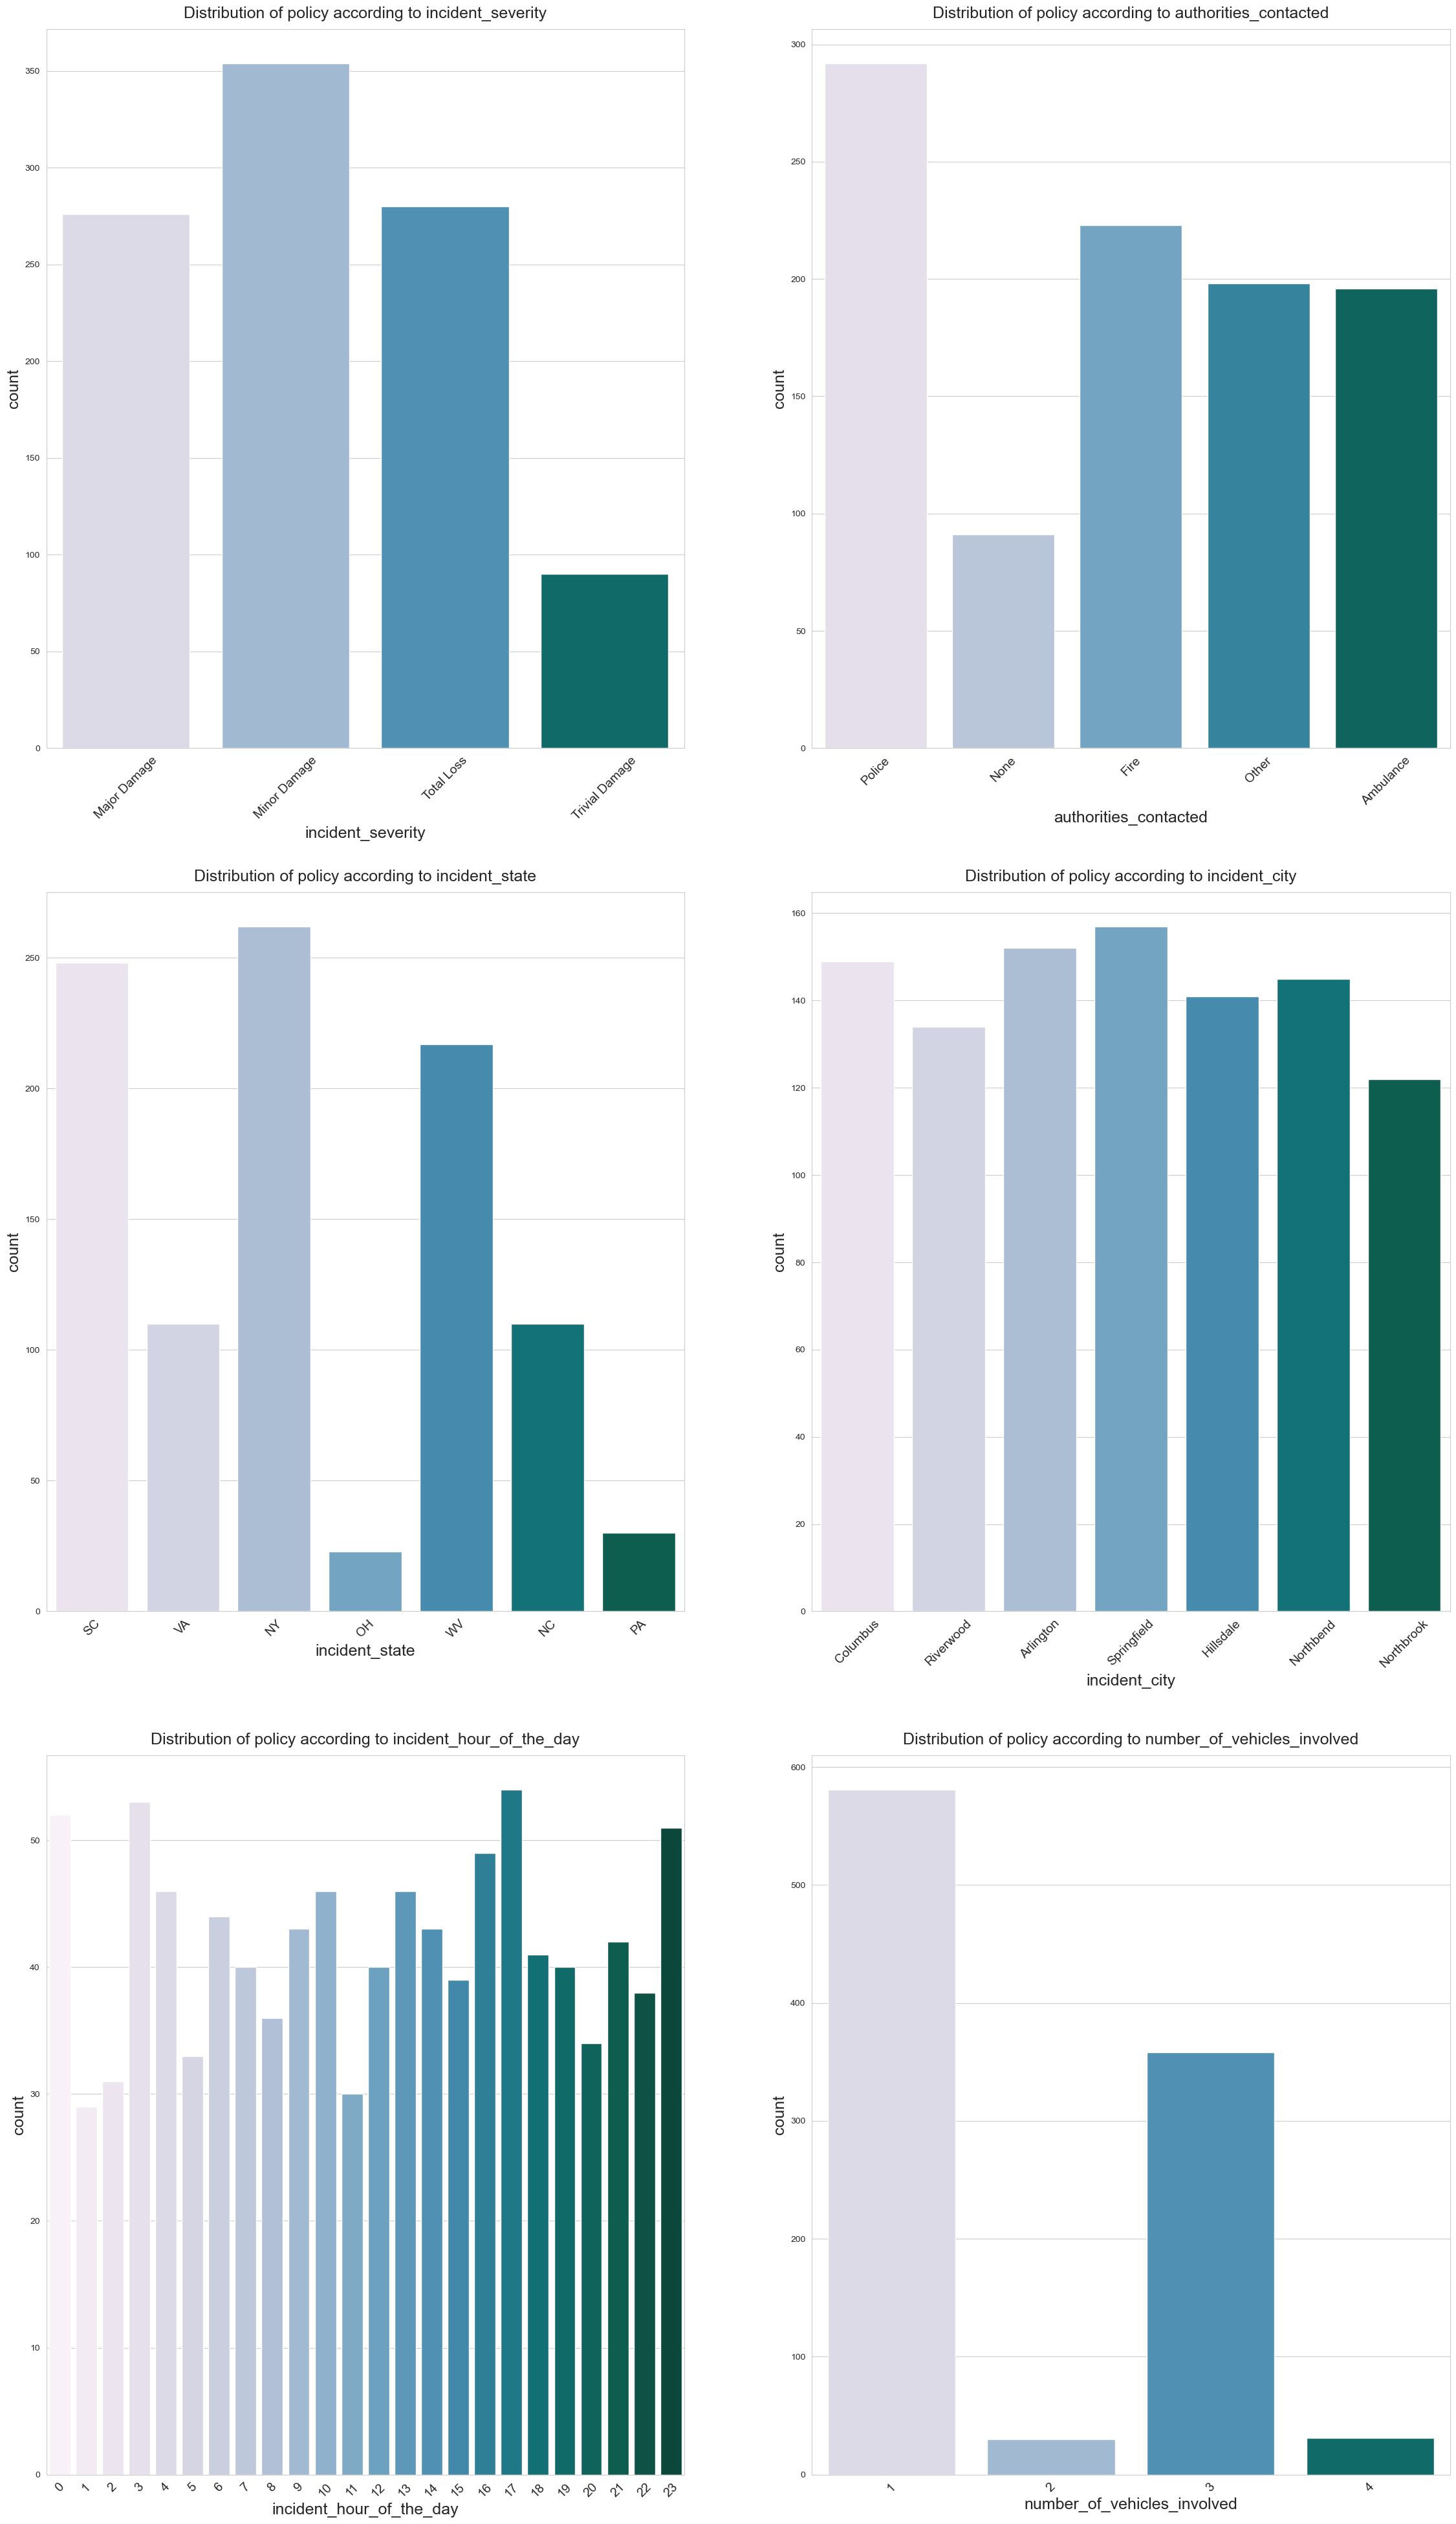

In [88]:
sns.set_style(style='whitegrid')
attributes = ['incident_severity', 'authorities_contacted','incident_state','incident_city','incident_hour_of_the_day','number_of_vehicles_involved']
fig, axis = plt.subplots(3,2,figsize=(28, 20))
fig.subplots_adjust(top=2.0)
count=0
for i in range(3):
    for j in range(2):
        sns.countplot(data=df,x=attributes[count],ax=axis[i,j],palette='PuBuGn')
        axis[i,j].set_title(f"Distribution of policy according to {attributes[count]}", pad=12, fontsize=18)
        axis[i,j].set_xticklabels(axis[i,j].get_xticklabels(), rotation=45,fontsize=14)
        axis[i,j].set_xlabel(f"{attributes[count]}",fontsize=18)
        axis[i,j].set_ylabel("count",fontsize=18)
        count += 1
plt.show()

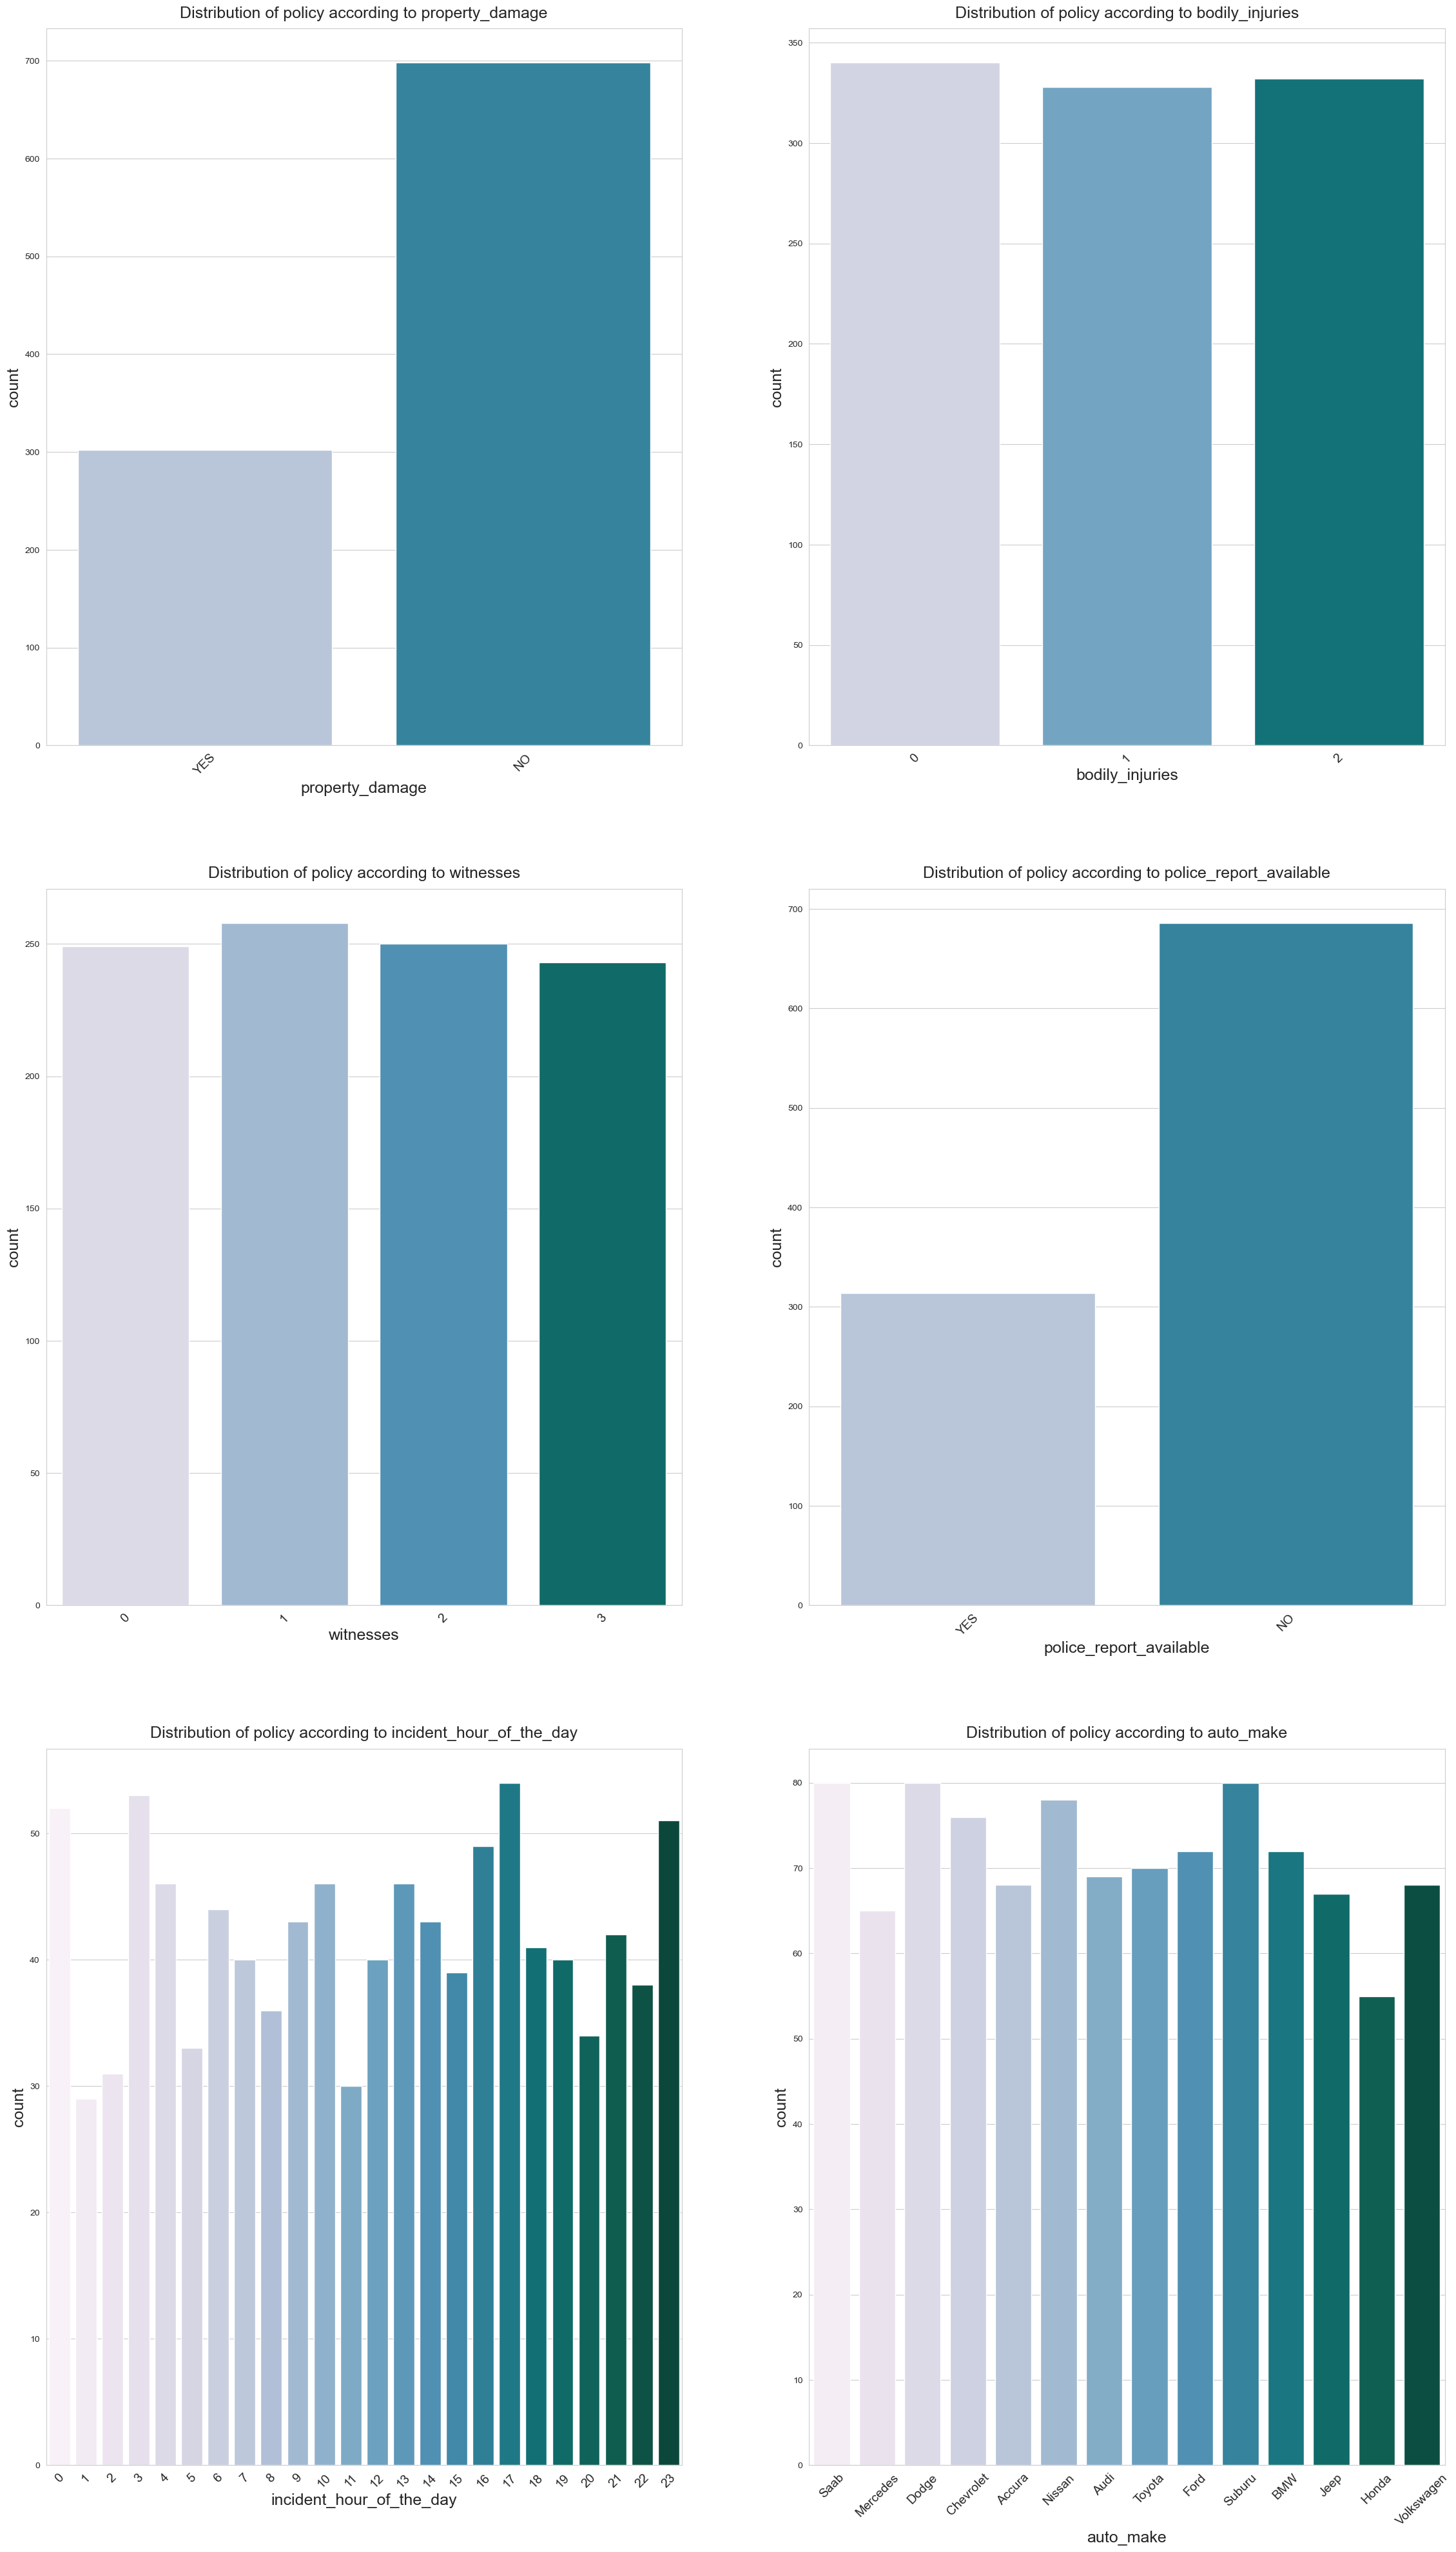

In [89]:
sns.set_style(style='whitegrid')
attributes = ['property_damage', 'bodily_injuries','witnesses','police_report_available','incident_hour_of_the_day','auto_make']
fig, axis = plt.subplots(3,2,figsize=(28, 20))
fig.subplots_adjust(top=2.0)
count=0
for i in range(3):
    for j in range(2):
        sns.countplot(data=df,x=attributes[count],ax=axis[i,j],palette='PuBuGn')
        axis[i,j].set_title(f"Distribution of policy according to {attributes[count]}", pad=12, fontsize=18)
        axis[i,j].set_xticklabels(axis[i,j].get_xticklabels(), rotation=45,fontsize=14)
        axis[i,j].set_xlabel(f"{attributes[count]}",fontsize=18)
        axis[i,j].set_ylabel("count",fontsize=18)
        count += 1
plt.show()

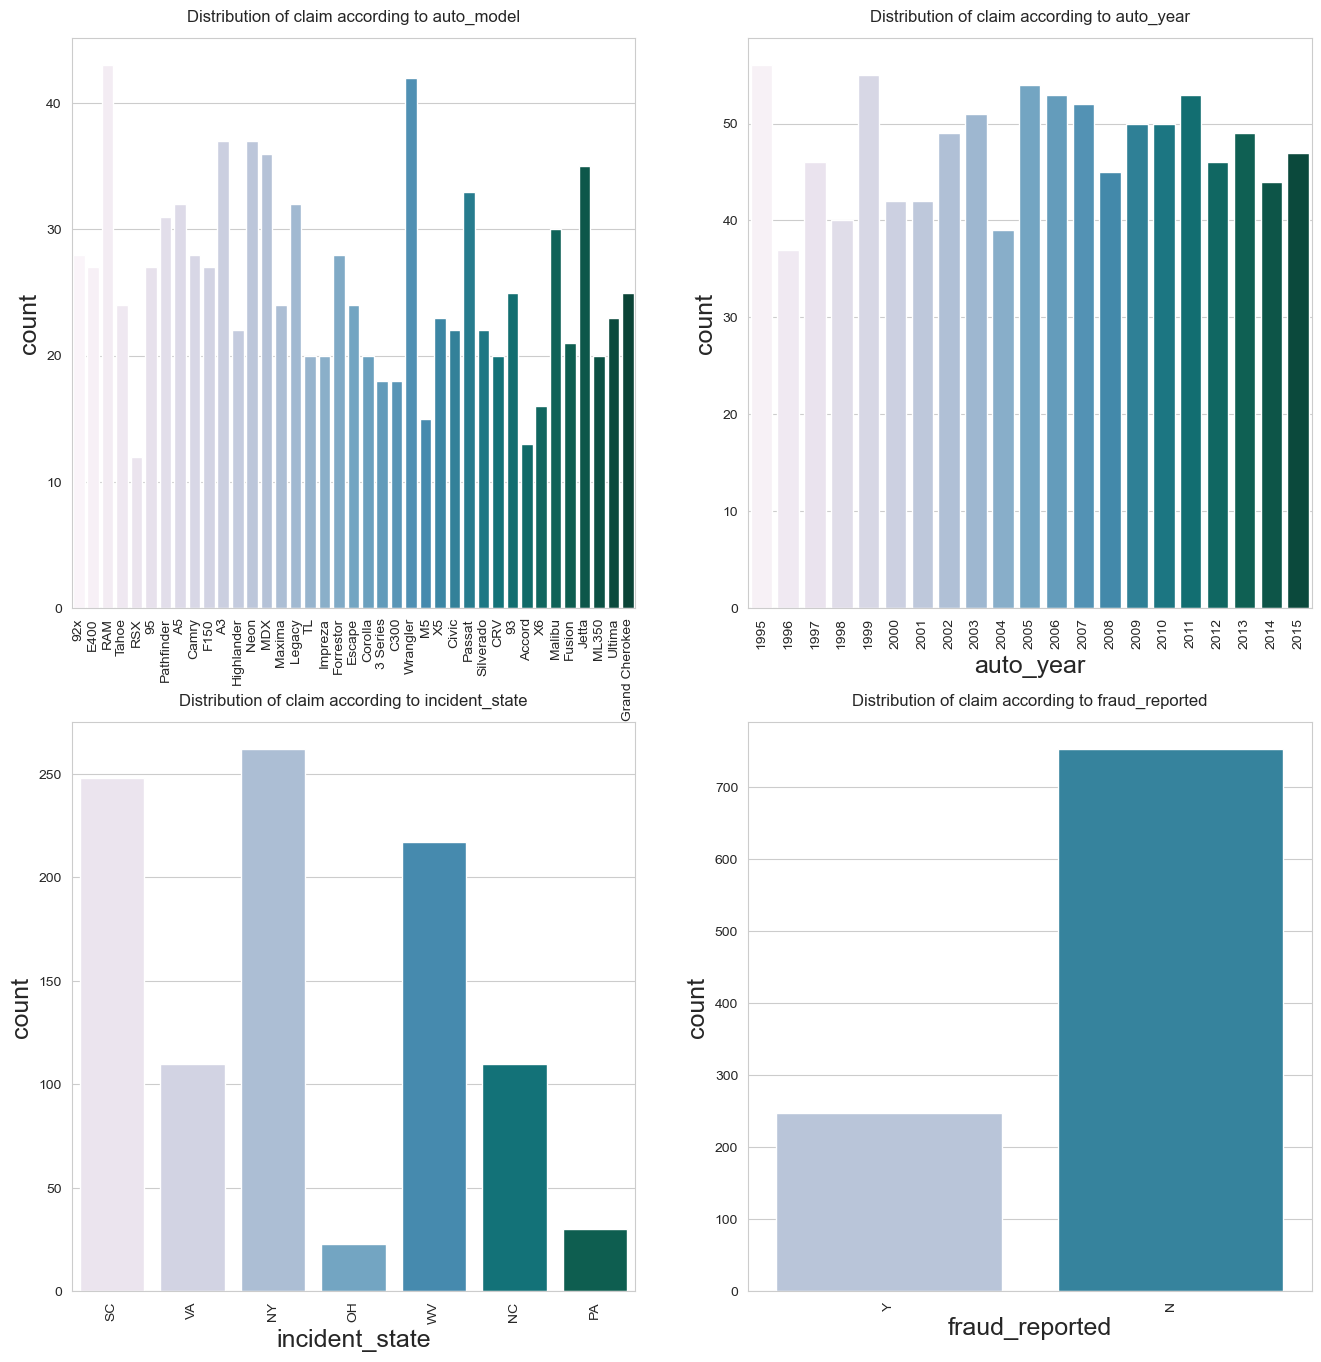

In [90]:
sns.set_style(style='whitegrid')
attributes = ['auto_model', 'auto_year','incident_state','fraud_reported']
fig, axis = plt.subplots(2,2,figsize=(16, 7))
fig.subplots_adjust(top=1.9)
count=0
for i in range(2):
    for j in range(2):
        sns.countplot(data=df,x=attributes[count],ax=axis[i,j],palette='PuBuGn')
        axis[i,j].set_title(f"Distribution of claim according to {attributes[count]}", pad=12, fontsize=12)
        axis[i,j].set_xticklabels(axis[i,j].get_xticklabels(), rotation=90)
        axis[i,j].set_xlabel(f"{attributes[count]}",fontsize=18)
        axis[i,j].set_ylabel("count",fontsize=18)
        count += 1
plt.show()

#### Analysis of fraud_reported with respect to insured_sex

In [91]:
df_plot = df.groupby(['fraud_reported','insured_sex']).size().reset_index().pivot(columns='fraud_reported', index='insured_sex', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot


fraud_reported    N    Y  Total  %of fraud reported  %of no fraud reported
insured_sex                                                               
FEMALE          411  126    537           23.463687              76.536313
MALE            342  121    463           26.133909              73.866091

<Axes: xlabel='insured_sex'>

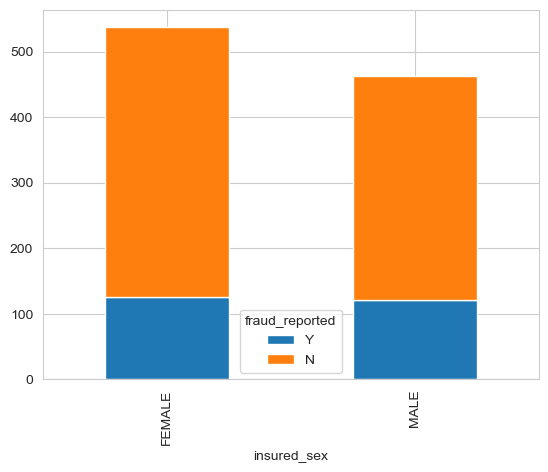

In [92]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- The number of Insurance claimed  by female customers is little more than male customer.
- percentage of no fraud reported is higher in each case.
- However there is no significance difference in fraud reported  based upon gender.

In [93]:
##### Product with respect to Gender:
fraud_gender_df = pd.crosstab(index=df['insured_sex'], columns=[df['fraud_reported']])
fraud_gender_df

fraud_reported    N    Y
insured_sex             
FEMALE          411  126
MALE            342  121

In [94]:
def p_prod_given_gender(insured_sex, print_marginal=False):
    
    p_yes= fraud_gender_df['Y'][insured_sex] / fraud_gender_df.loc[insured_sex].sum()
    p_no = fraud_gender_df['N'][insured_sex] / fraud_gender_df.loc[insured_sex].sum()
    
    if print_marginal:
        print("Marginal probability for different type of Gender are below:")
        print("\n")
        print(f"P(Male): {fraud_gender_df.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {fraud_gender_df.loc['Female'].sum()/len(df):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of product in given gender is {insured_sex} below:")
    print("\n")
    print(f"P('Y'|{insured_sex}): {p_yes:.2f}")
    print(f"P('N'|{insured_sex}): {p_no:.2f}")
    
p_prod_given_gender('MALE')
p_prod_given_gender('FEMALE')



Conditional probability for different type of product in given gender is MALE below:


P('Y'|MALE): 0.26
P('N'|MALE): 0.74


Conditional probability for different type of product in given gender is FEMALE below:


P('Y'|FEMALE): 0.23
P('N'|FEMALE): 0.77


In [95]:
##### Product with respect to Gender:
fraud_gender_df = pd.crosstab(index=df['fraud_reported'], columns=[df['insured_sex']])
fraud_gender_df

insured_sex     FEMALE  MALE
fraud_reported              
N                  411   342
Y                  126   121

In [96]:
def p_prod_given_fraud_reported(fraud_reported, print_marginal=False):
    
    p_male= fraud_gender_df['MALE'][fraud_reported] / fraud_gender_df.loc[fraud_reported].sum()
    p_female = fraud_gender_df['FEMALE'][fraud_reported] / fraud_gender_df.loc[fraud_reported].sum()
    
    if print_marginal:
        print("Marginal probability for different type of Gender are below:")
        print("\n")
        print(f"P(N): {fraud_gender_df.loc['N'].sum()/len(df):.2f}")
        print(f"P(Y): {fraud_gender_df.loc['Y'].sum()/len(df):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of gender in given fraud_reported is {fraud_reported} below:")
    print("\n")
    print(f"P('MALE'|{fraud_reported}): {p_male:.2f}")
    print(f"P('FEMALE'|{fraud_reported}): {p_female:.2f}")
    
p_prod_given_fraud_reported('Y')
p_prod_given_fraud_reported('N')



Conditional probability for different type of gender in given fraud_reported is Y below:


P('MALE'|Y): 0.49
P('FEMALE'|Y): 0.51


Conditional probability for different type of gender in given fraud_reported is N below:


P('MALE'|N): 0.45
P('FEMALE'|N): 0.55


#### Analysis of fraud_reported with respect to policy_state

In [97]:
df_plot = df.groupby(['fraud_reported','policy_state']).size().reset_index().pivot(columns='fraud_reported', index='policy_state', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot


fraud_reported    N   Y  Total  %of fraud reported  %of no fraud reported
policy_state                                                             
IL              261  77    338           22.781065              77.218935
IN              231  79    310           25.483871              74.516129
OH              261  91    352           25.852273              74.147727

<Axes: xlabel='policy_state'>

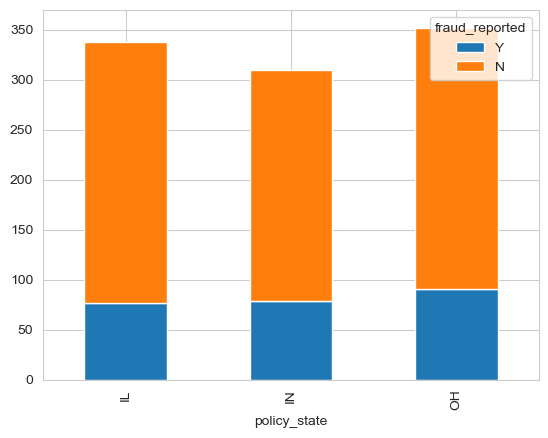

In [98]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

In [99]:
##### Product with respect to Gender:
fraud_ps_df = pd.crosstab(index=df['fraud_reported'], columns=[df['policy_state']])
fraud_ps_df

policy_state     IL   IN   OH
fraud_reported               
N               261  231  261
Y                77   79   91

In [100]:
def p_prod_given_fraud_reported(fraud_reported, print_marginal=False):
    
    p_IL= fraud_ps_df['IL'][fraud_reported] / fraud_ps_df.loc[fraud_reported].sum()
    p_IN = fraud_ps_df['IN'][fraud_reported] / fraud_ps_df.loc[fraud_reported].sum()
    p_OH = fraud_ps_df['OH'][fraud_reported] / fraud_ps_df.loc[fraud_reported].sum()
    
    if print_marginal:
        print("Marginal probability for different type of policy state are below:")
        print("\n")
        print(f"P(N): {fraud_ps_df.loc['N'].sum()/len(df):.2f}")
        print(f"P(Y): {fraud_ps_df.loc['Y'].sum()/len(df):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of policy state in given fraud_reported is {fraud_reported} below:")
    print("\n")
    print(f"P('IL'|{fraud_reported}): {p_IL:.2f}")
    print(f"P('IN'|{fraud_reported}): {p_IN:.2f}")
    print(f"P('OH'|{fraud_reported}): {p_OH:.2f}")
    
p_prod_given_fraud_reported('Y')
p_prod_given_fraud_reported('N')



Conditional probability for different type of policy state in given fraud_reported is Y below:


P('IL'|Y): 0.31
P('IN'|Y): 0.32
P('OH'|Y): 0.37


Conditional probability for different type of policy state in given fraud_reported is N below:


P('IL'|N): 0.35
P('IN'|N): 0.31
P('OH'|N): 0.35


** Observation **
-  Insurance claimed having policy state 'OH' is higher. 
- percentage of no fraud reported is higher in each case.
- Fraud reported is little more in case of policy state having 'IN' and 'OH' than 'IL'.

#### Analysis of fraud_reported with respect to policy_csl

In [101]:
df_plot = df.groupby(['fraud_reported','policy_csl']).size().reset_index().pivot(columns='fraud_reported', index='policy_csl', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported    N   Y  Total  %of fraud reported  %of no fraud reported
policy_csl                                                               
100/300         259  90    349           25.787966              74.212034
250/500         259  92    351           26.210826              73.789174
500/1000        235  65    300           21.666667              78.333333

<Axes: xlabel='policy_csl'>

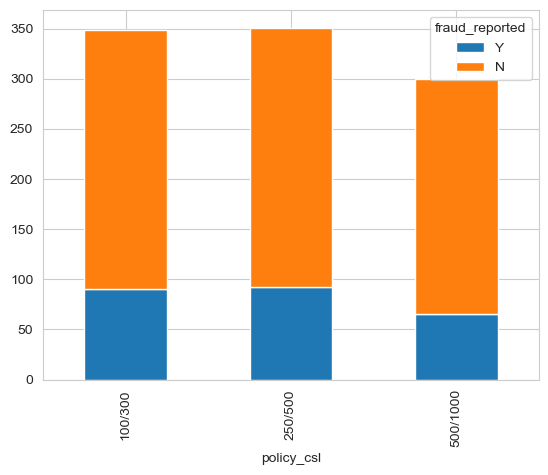

In [102]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed having policy_csl '100/300' and '250/500' is higher than  '500/1000'.
- percentage of no fraud reported is higher in each case.
- percentage of Fraud reported is almost same in case of '100/300' and '250/500'.
- comparatively to others percentage of fraud reported in case of '500/1000' is less.

#### Analysis of fraud_reported with respect to policy_deductable

In [103]:
df_plot = df.groupby(['fraud_reported','policy_deductable']).size().reset_index().pivot(columns='fraud_reported', index='policy_deductable', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported       N   Y  Total  %of fraud reported  %of no fraud reported
policy_deductable                                                           
500                255  87    342           25.438596              74.561404
1000               272  79    351           22.507123              77.492877
2000               226  81    307           26.384365              73.615635

<Axes: xlabel='policy_deductable'>

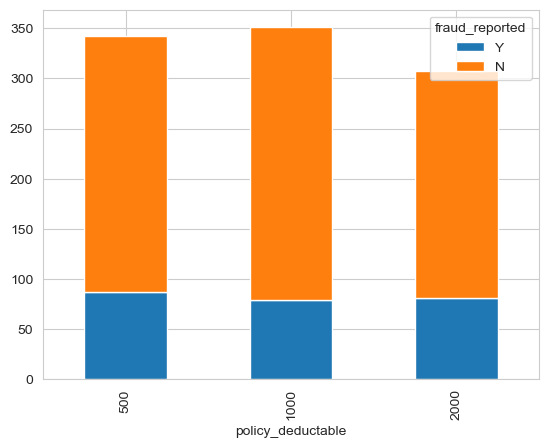

In [104]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed having policy_deductable '1000'.
- percentage of no fraud reported is higher in each case.
- percentage of Fraud reported is almost same in case of '1000' and '500'.
- comparatively to others percentage of fraud reported in case of '1000' is less, however there is there is no 
  significance difference in '500' and '2000'

#### Analysis of fraud_reported with respect to umbrella_limit

In [105]:
df_plot = df.groupby(['fraud_reported','umbrella_limit']).size().reset_index().pivot(columns='fraud_reported', index='umbrella_limit', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported      N      Y  Total  %of fraud reported  %of no fraud reported
umbrella_limit                                                                
-1000000          1.0    NaN    NaN                 NaN                    NaN
 0              611.0  187.0  798.0           23.433584              76.566416
 2000000          1.0    2.0    3.0           66.666667              33.333333
 3000000         10.0    2.0   12.0           16.666667              83.333333
 4000000         26.0   13.0   39.0           33.333333              66.666667
 5000000         31.0   15.0   46.0           32.608696              67.391304
 6000000         44.0   13.0   57.0           22.807018              77.192982
 7000000         20.0    9.0   29.0           31.034483              68.965517
 8000000          5.0    3.0    8.0           37.500000              62.500000
 9000000          3.0    2.0    5.0           40.000000              60.000000
 10000000         1.0    1.0    2.0           50.000000              50.000000

<Axes: xlabel='umbrella_limit'>

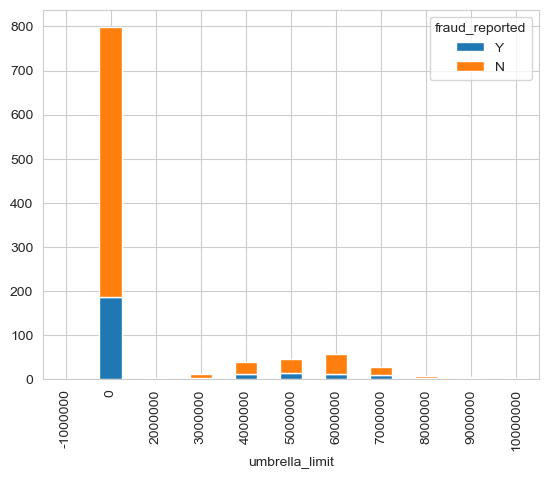

In [106]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- most of the insurance claimed where the umbrella limit is '0' and the rate is significantly high than others
- in rest categories of umbrella_limit '2000000' has the highest fraud reported and '6000000' has the lowest

#### Analysis of fraud_reported with respect to insured_education_level

In [107]:
df_plot = df.groupby(['fraud_reported','insured_education_level']).size().reset_index().pivot(columns='fraud_reported', index='insured_education_level', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported             N   Y  Total  %of fraud reported  \
insured_education_level                                       
Associate                111  34    145           23.448276   
College                   90  32    122           26.229508   
High School              124  36    160           22.500000   
JD                       119  42    161           26.086957   
MD                       106  38    144           26.388889   
Masters                  111  32    143           22.377622   
PhD                       92  33    125           26.400000   

fraud_reported           %of no fraud reported  
insured_education_level                         
Associate                            76.551724  
College                              73.770492  
High School                          77.500000  
JD                                   73.913043  
MD                                   73.611111  
Masters                              77.622378  
PhD                                  73.600000

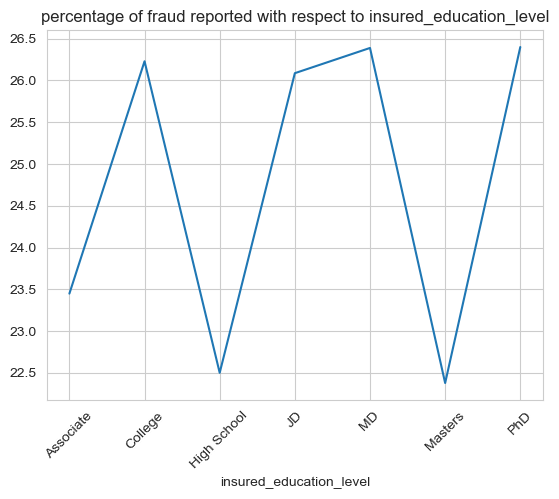

In [108]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to insured_education_level") 
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='insured_education_level'>

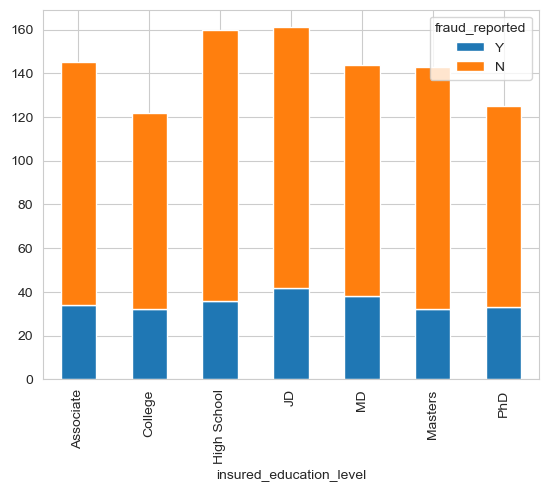

In [109]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed having education_level college and highschool is higher
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in education level 'college','jd','md','phd'. However others also have
  significant fraud reported.

#### Analysis of fraud_reported with respect to insured_occupation

In [110]:
df_plot = df.groupby(['fraud_reported','insured_occupation']).size().reset_index().pivot(columns='fraud_reported', index='insured_occupation', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported       N   Y  Total  %of fraud reported  %of no fraud reported
insured_occupation                                                          
adm-clerical        54  11     65           16.923077              83.076923
armed-forces        52  17     69           24.637681              75.362319
craft-repair        52  22     74           29.729730              70.270270
exec-managerial     48  28     76           36.842105              63.157895
farming-fishing     37  16     53           30.188679              69.811321
handlers-cleaners   43  11     54           20.370370              79.629630
machine-op-inspct   71  22     93           23.655914              76.344086
other-service       59  12     71           16.901408              83.098592
priv-house-serv     59  12     71           16.901408              83.098592
prof-specialty      67  18     85           21.176471              78.823529
protective-serv     49  14     63           22.222222              77.777778
sales               55  21     76           27.631579              72.368421
tech-support        56  22     78           28.205128              71.794872
transport-moving    51  21     72           29.166667              70.833333

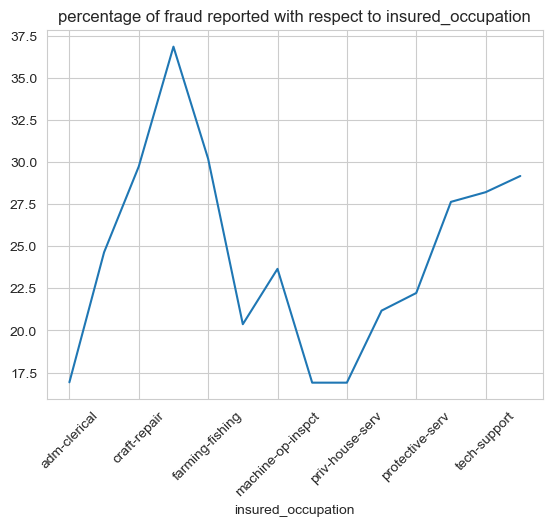

In [111]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to insured_occupation") 
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='insured_occupation'>

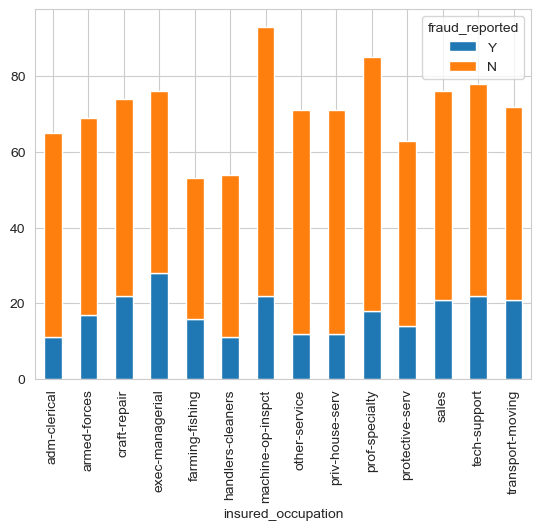

In [112]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed having insured_occupation 'machine-op-inspct'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in insured occupation 'exec-managerial','farming-fishing','craft-        repair','transport-moving'. However others also have significant fraud reported.

#### Analysis of fraud_reported with respect to insured_hobbies

In [113]:
df_plot = df.groupby(['fraud_reported','insured_hobbies']).size().reset_index().pivot(columns='fraud_reported', index='insured_hobbies', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported    N   Y  Total  %of fraud reported  %of no fraud reported
insured_hobbies                                                          
base-jumping     36  13     49           26.530612              73.469388
basketball       28   6     34           17.647059              82.352941
board-games      34  14     48           29.166667              70.833333
bungie-jumping   47   9     56           16.071429              83.928571
camping          50   5     55            9.090909              90.909091
chess             8  38     46           82.608696              17.391304
cross-fit         9  26     35           74.285714              25.714286
dancing          38   5     43           11.627907              88.372093
exercise         46  11     57           19.298246              80.701754
golf             49   6     55           10.909091              89.090909
hiking           40  12     52           23.076923              76.923077
kayaking         49   5     54            9.259259              90.740741
movies           46   9     55           16.363636              83.636364
paintball        44  13     57           22.807018              77.192982
polo             34  13     47           27.659574              72.340426
reading          47  17     64           26.562500              73.437500
skydiving        38  11     49           22.448980              77.551020
sleeping         33   8     41           19.512195              80.487805
video-games      40  10     50           20.000000              80.000000
yachting         37  16     53           30.188679              69.811321

Text(0.5, 1.0, 'percentage of fraud reported with respect to insured_hobbies')

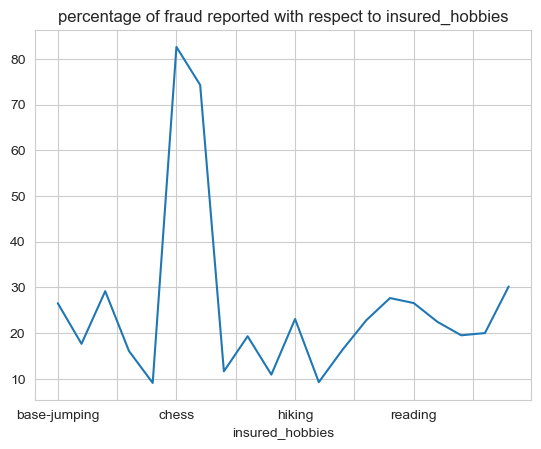

In [114]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to insured_hobbies") 

<Axes: xlabel='insured_hobbies'>

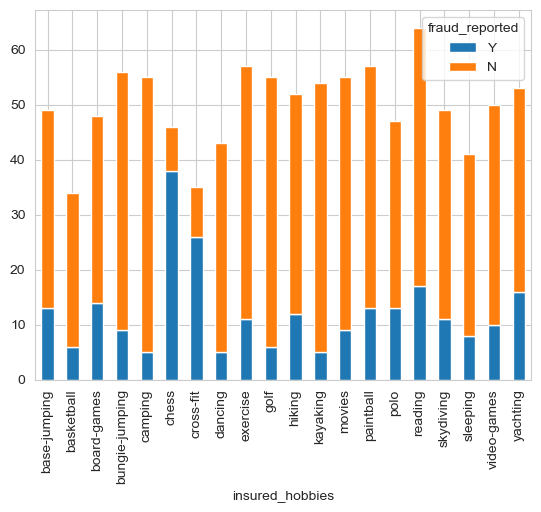

In [115]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed having insured_hobbies 'reading'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in insured hobbies 'chess','crossfit'. However others also have significant fraud reported.

#### Analysis of fraud_reported with respect to insured_relationship

In [116]:
df_plot = df.groupby(['fraud_reported','insured_relationship']).size().reset_index().pivot(columns='fraud_reported', index='insured_relationship', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported          N   Y  Total  %of fraud reported  \
insured_relationship                                       
husband               135  35    170           20.588235   
not-in-family         129  45    174           25.862069   
other-relative        125  52    177           29.378531   
own-child             144  39    183           21.311475   
unmarried             107  34    141           24.113475   
wife                  113  42    155           27.096774   

fraud_reported        %of no fraud reported  
insured_relationship                         
husband                           79.411765  
not-in-family                     74.137931  
other-relative                    70.621469  
own-child                         78.688525  
unmarried                         75.886525  
wife                              72.903226

Text(0.5, 1.0, 'percentage of fraud reported with respect to insured_relationship')

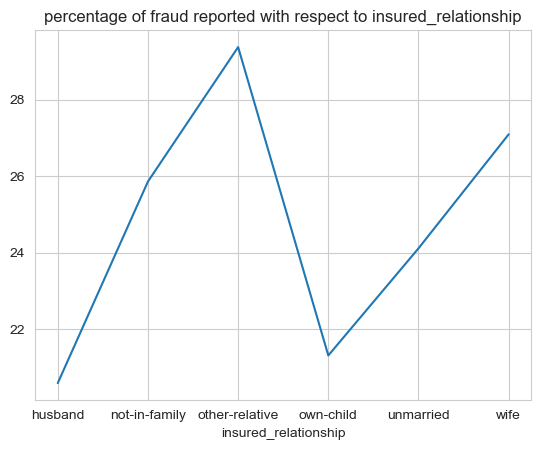

In [117]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to insured_relationship") 

<Axes: xlabel='insured_relationship'>

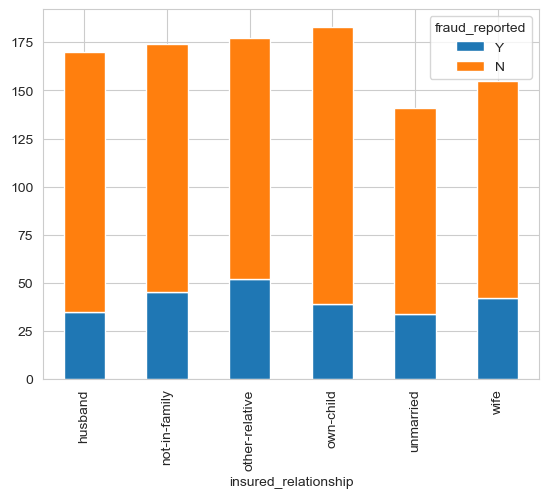

In [118]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed having insured_relationship 'own-child'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in insured relationship 'other-relative','not-in-family','wife'. However others also have significant fraud reported.

#### Analysis of fraud_reported with respect to incident_type

In [119]:
df_plot = df.groupby(['fraud_reported','incident_type']).size().reset_index().pivot(columns='fraud_reported', index='incident_type', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported              N    Y  Total  %of fraud reported  \
incident_type                                                   
Multi-vehicle Collision   305  114    419           27.207637   
Parked Car                 76    8     84            9.523810   
Single Vehicle Collision  286  117    403           29.032258   
Vehicle Theft              86    8     94            8.510638   

fraud_reported            %of no fraud reported  
incident_type                                    
Multi-vehicle Collision               72.792363  
Parked Car                            90.476190  
Single Vehicle Collision              70.967742  
Vehicle Theft                         91.489362

Text(0.5, 1.0, 'percentage of fraud reported with respect to incident_type')

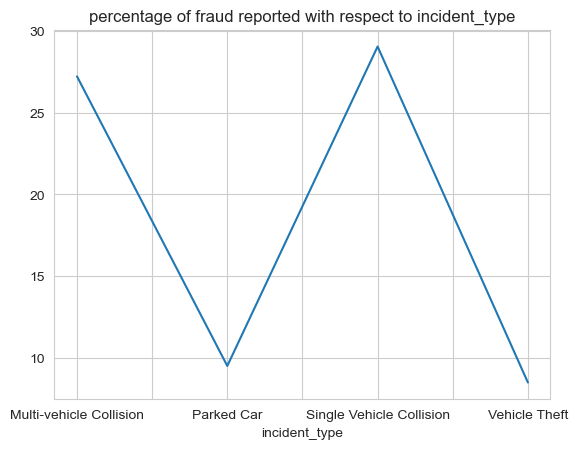

In [120]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to incident_type") 

<Axes: xlabel='incident_type'>

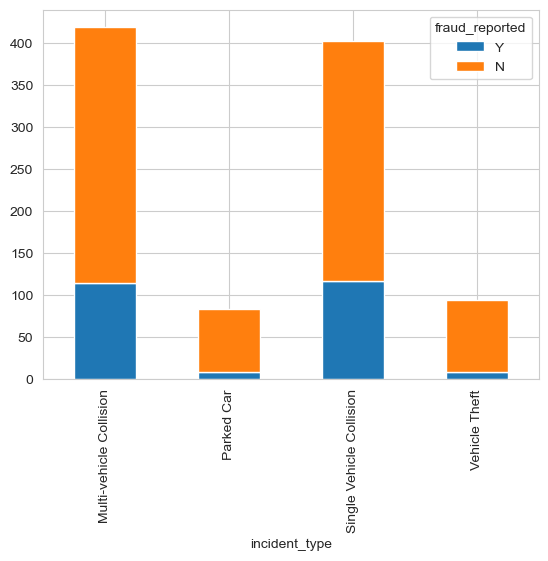

In [121]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed having incident_type 'Multi-veichlecollision'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in insident type 'Multi-veichlecollision','single-veichlecollision'. However others also have significant fraud reported.

#### Analysis of fraud_reported with respect to collision_type

In [122]:
df_plot = df.groupby(['fraud_reported','collision_type']).size().reset_index().pivot(columns='fraud_reported', index='collision_type', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported     N    Y  Total  %of fraud reported  %of no fraud reported
collision_type                                                             
Front Collision  184   70    254           27.559055              72.440945
Rear Collision   363  107    470           22.765957              77.234043
Side Collision   206   70    276           25.362319              74.637681

Text(0.5, 1.0, 'percentage of fraud reported with respect to collision type')

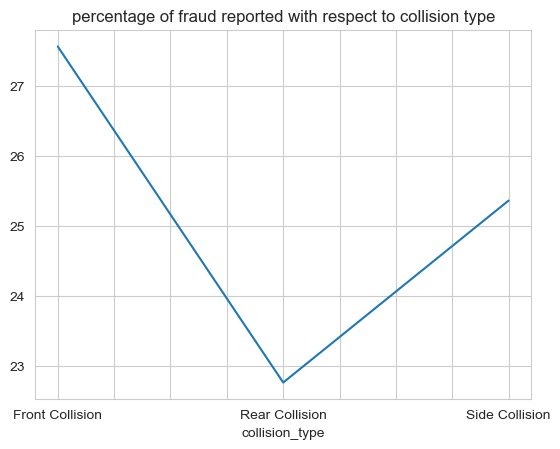

In [123]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to collision type") 

<Axes: xlabel='collision_type'>

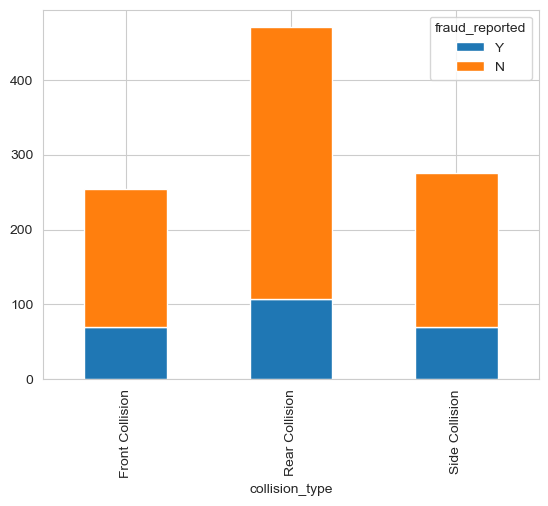

In [124]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- more insurance claimed having collision_type 'Rear collision'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in collision type 'Front collision'. However others also have significant fraud reported.

#### Analysis of fraud_reported with respect to incident_severity

In [125]:
df_plot = df.groupby(['fraud_reported','incident_severity']).size().reset_index().pivot(columns='fraud_reported', index='incident_severity', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported       N    Y  Total  %of fraud reported  %of no fraud reported
incident_severity                                                            
Major Damage       109  167    276           60.507246              39.492754
Minor Damage       316   38    354           10.734463              89.265537
Total Loss         244   36    280           12.857143              87.142857
Trivial Damage      84    6     90            6.666667              93.333333

Text(0.5, 1.0, 'percentage of fraud reported with respect to incident_severity')

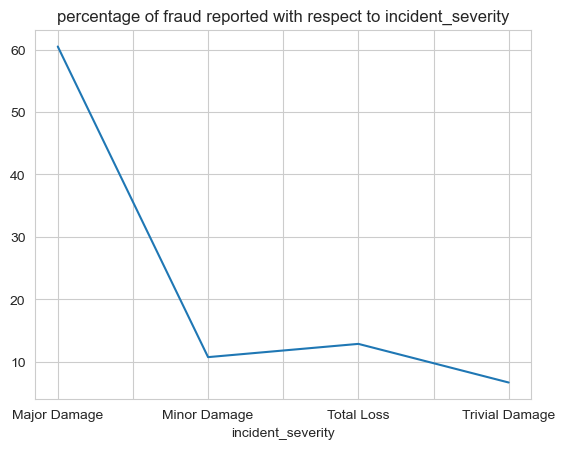

In [126]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to incident_severity") 

<Axes: xlabel='incident_severity'>

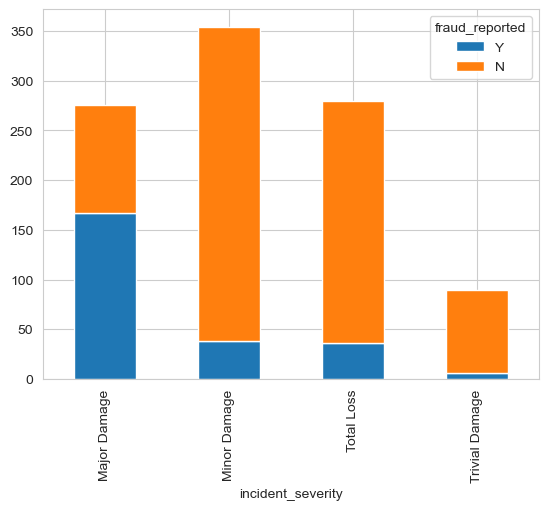

In [127]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- more insurance claimed having incident_type 'minor damage'.
- percentage of no fraud reported is higher in each case except Major Damage.
- percentage of fraud reported is higher in insident sevierty 'Major damage'. However others also have significant fraud reported.
- It is less in case of trivial damage.

#### Analysis of fraud_reported with respect to authorities_contacted

In [128]:
df_plot = df.groupby(['fraud_reported','authorities_contacted']).size().reset_index().pivot(columns='fraud_reported', index='authorities_contacted', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported           N   Y  Total  %of fraud reported  \
authorities_contacted                                       
Ambulance              139  57    196           29.081633   
Fire                   163  60    223           26.905830   
None                    85   6     91            6.593407   
Other                  135  63    198           31.818182   
Police                 231  61    292           20.890411   

fraud_reported         %of no fraud reported  
authorities_contacted                         
Ambulance                          70.918367  
Fire                               73.094170  
None                               93.406593  
Other                              68.181818  
Police                             79.109589

Text(0.5, 1.0, 'percentage of fraud reported with respect to authorities_contacted')

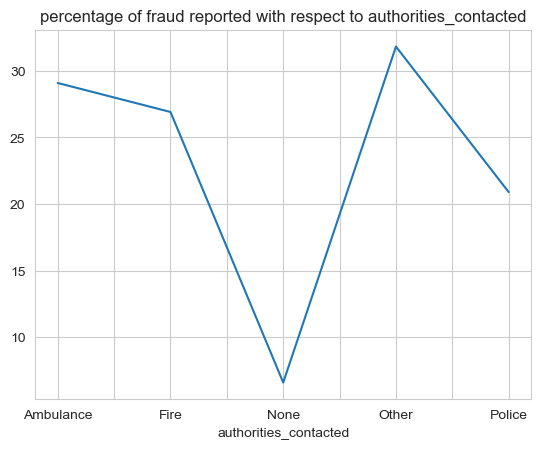

In [129]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to authorities_contacted") 

<Axes: xlabel='authorities_contacted'>

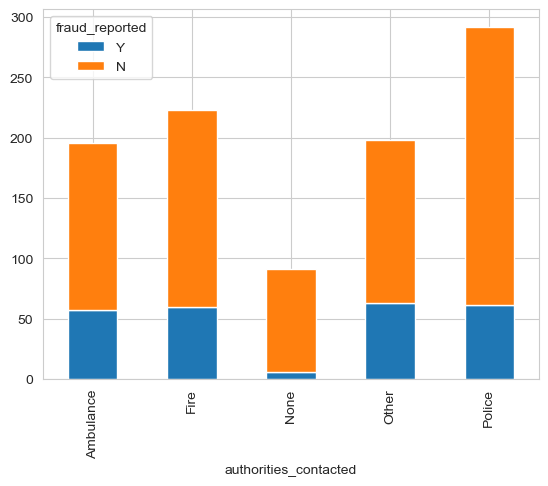

In [130]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- more insurance claimed having authorities_contacted 'police'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in authorities_contacted 'other','Ambulance'. However others also have significant fraud reported.
- It is less in case of None.

#### Analysis of fraud_reported with respect to incident_state

In [131]:
df_plot = df.groupby(['fraud_reported','incident_state']).size().reset_index().pivot(columns='fraud_reported', index='incident_state', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported    N   Y  Total  %of fraud reported  %of no fraud reported
incident_state                                                           
NC               76  34    110           30.909091              69.090909
NY              204  58    262           22.137405              77.862595
OH               13  10     23           43.478261              56.521739
PA               22   8     30           26.666667              73.333333
SC              175  73    248           29.435484              70.564516
VA               85  25    110           22.727273              77.272727
WV              178  39    217           17.972350              82.027650

Text(0.5, 1.0, 'percentage of fraud reported with respect to incident_state')

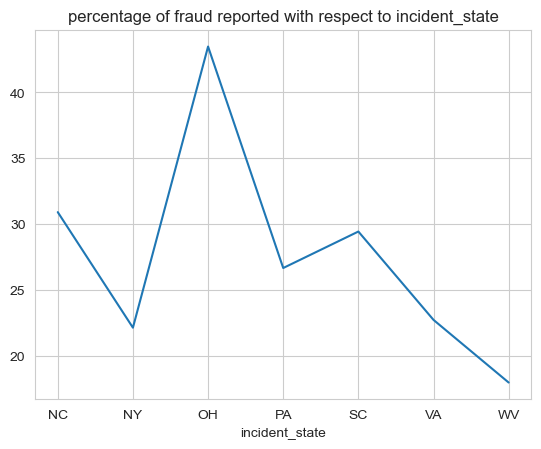

In [132]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to incident_state") 

<Axes: xlabel='incident_state'>

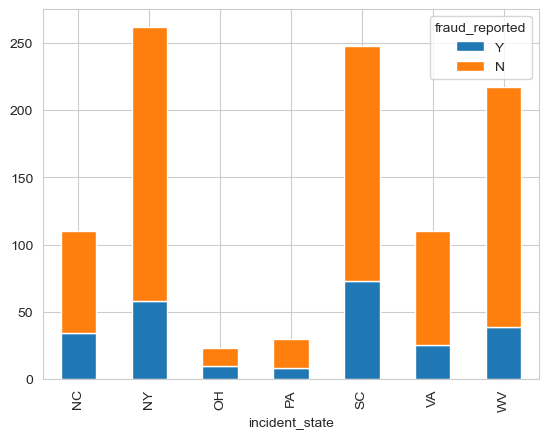

In [133]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- more insurance claimed having incident_state 'NY'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in incident state 'NC','SC','NY','VA'. However others also have significant fraud reported.
- It is less in case of 'VW'.

#### Analysis of fraud_reported with respect to incident_city

In [134]:
df_plot = df.groupby(['fraud_reported','incident_city']).size().reset_index().pivot(columns='fraud_reported', index='incident_city', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported    N   Y  Total  %of fraud reported  %of no fraud reported
incident_city                                                            
Arlington       108  44    152           28.947368              71.052632
Columbus        110  39    149           26.174497              73.825503
Hillsdale       106  35    141           24.822695              75.177305
Northbend       111  34    145           23.448276              76.551724
Northbrook       95  27    122           22.131148              77.868852
Riverwood       104  30    134           22.388060              77.611940
Springfield     119  38    157           24.203822              75.796178

Text(0.5, 1.0, 'percentage of fraud reported with respect to incident city')

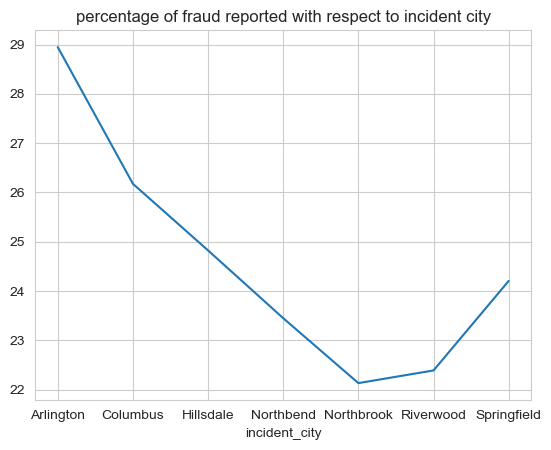

In [135]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to incident city") 

<Axes: xlabel='incident_city'>

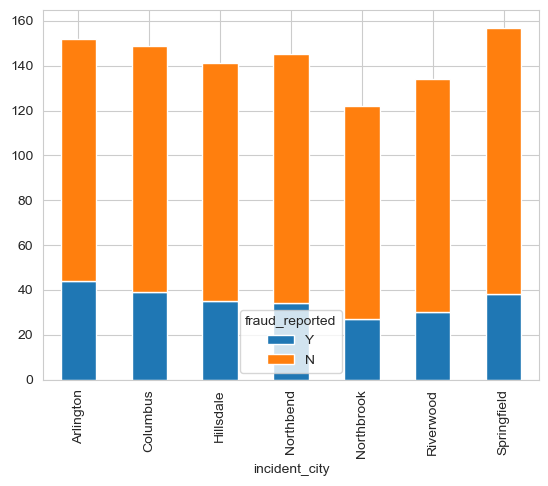

In [136]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- More Insurance claimed having incident_city 'springfield'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is almost equal in each case.

#### Analysis of fraud_reported with respect to number_of_vehicles_involved

In [137]:
df_plot = df.groupby(['fraud_reported','number_of_vehicles_involved']).size().reset_index().pivot(columns='fraud_reported', index='number_of_vehicles_involved', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported                 N    Y  Total  %of fraud reported  \
number_of_vehicles_involved                                        
1                            448  133    581           22.891566   
2                             21    9     30           30.000000   
3                            264   94    358           26.256983   
4                             20   11     31           35.483871   

fraud_reported               %of no fraud reported  
number_of_vehicles_involved                         
1                                        77.108434  
2                                        70.000000  
3                                        73.743017  
4                                        64.516129

<Axes: xlabel='number_of_vehicles_involved'>

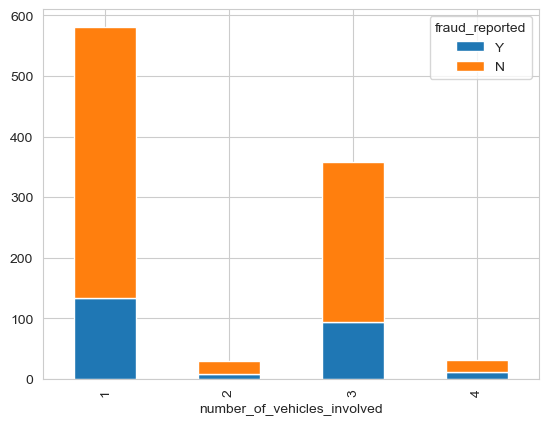

In [138]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
-  more Insurance claimed having  number of veichle involved '1'.
- percentage of no fraud reported is higher in each case except Major Damage.
- percentage of fraud reported is higher in number of veichle involved '4' and '2'. However others also have significant fraud reported.

#### Analysis of fraud_reported with respect to property_damage

In [139]:
df_plot = df.groupby(['fraud_reported','property_damage']).size().reset_index().pivot(columns='fraud_reported', index='property_damage', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported     N    Y  Total  %of fraud reported  %of no fraud reported
property_damage                                                            
NO               529  169    698           24.212034              75.787966
YES              224   78    302           25.827815              74.172185

<Axes: xlabel='property_damage'>

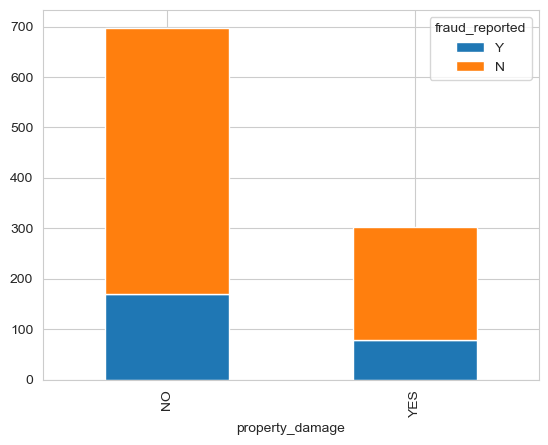

In [140]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- more Insurance claimed having property damaged.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher in property damaged. However others also have significant fraud reported.

#### Analysis of fraud_reported with respect to bodily_injuries

In [141]:
df_plot = df.groupby(['fraud_reported','bodily_injuries']).size().reset_index().pivot(columns='fraud_reported', index='bodily_injuries', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported     N   Y  Total  %of fraud reported  %of no fraud reported
bodily_injuries                                                           
0                260  80    340           23.529412              76.470588
1                251  77    328           23.475610              76.524390
2                242  90    332           27.108434              72.891566

<Axes: xlabel='bodily_injuries'>

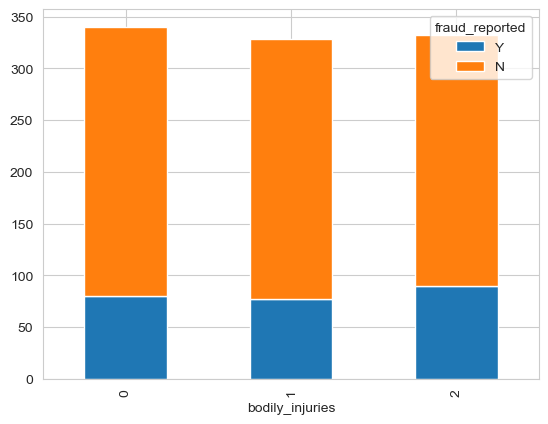

In [142]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed having  number of bodilyinjured is almost same.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is almost same in each case.

#### Analysis of fraud_reported with respect to witnesses

In [143]:
df_plot = df.groupby(['fraud_reported','witnesses']).size().reset_index().pivot(columns='fraud_reported', index='witnesses', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported    N   Y  Total  %of fraud reported  %of no fraud reported
witnesses                                                                
0               199  50    249           20.080321              79.919679
1               195  63    258           24.418605              75.581395
2               176  74    250           29.600000              70.400000
3               183  60    243           24.691358              75.308642

<Axes: xlabel='witnesses'>

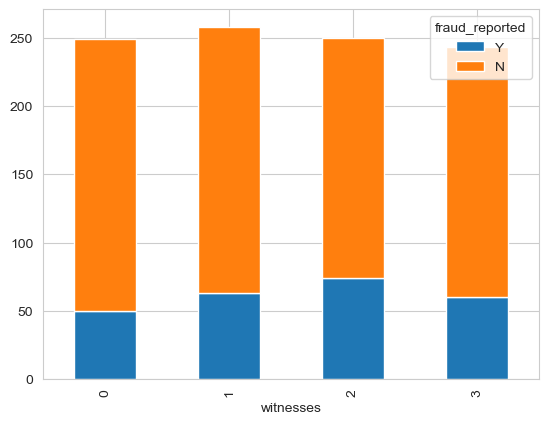

In [144]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
-  Insurance claimed having different number of witness is almost same.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is higher with witness 2 than others.

#### Analysis of fraud_reported with respect to police_report_available

In [145]:
df_plot = df.groupby(['fraud_reported','police_report_available']).size().reset_index().pivot(columns='fraud_reported', index='police_report_available', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported             N    Y  Total  %of fraud reported  \
police_report_available                                        
NO                       511  175    686           25.510204   
YES                      242   72    314           22.929936   

fraud_reported           %of no fraud reported  
police_report_available                         
NO                                   74.489796  
YES                                  77.070064

<Axes: xlabel='police_report_available'>

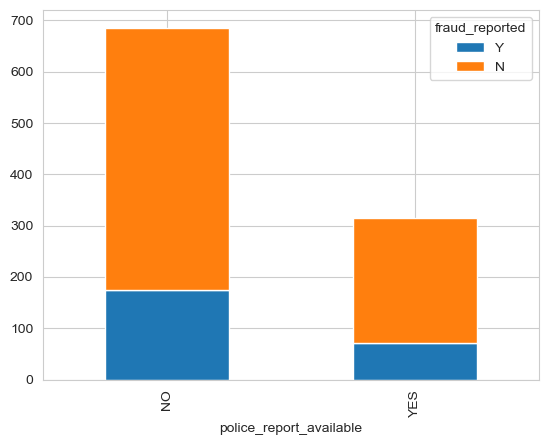

In [146]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed with no police report is more.
- percentage of no fraud reported is higher in each case.
- There is only 3 percentage of fraud reported more with no police report.

#### Analysis of fraud_reported with respect to auto_make

In [147]:
df_plot = df.groupby(['fraud_reported','auto_make']).size().reset_index().pivot(columns='fraud_reported', index='auto_make', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported   N   Y  Total  %of fraud reported  %of no fraud reported
auto_make                                                               
Accura          55  13     68           19.117647              80.882353
Audi            48  21     69           30.434783              69.565217
BMW             52  20     72           27.777778              72.222222
Chevrolet       55  21     76           27.631579              72.368421
Dodge           60  20     80           25.000000              75.000000
Ford            50  22     72           30.555556              69.444444
Honda           41  14     55           25.454545              74.545455
Jeep            56  11     67           16.417910              83.582090
Mercedes        43  22     65           33.846154              66.153846
Nissan          64  14     78           17.948718              82.051282
Saab            62  18     80           22.500000              77.500000
Suburu          61  19     80           23.750000              76.250000
Toyota          57  13     70           18.571429              81.428571
Volkswagen      49  19     68           27.941176              72.058824

Text(0.5, 1.0, 'percentage of fraud reported with respect to auto_make')

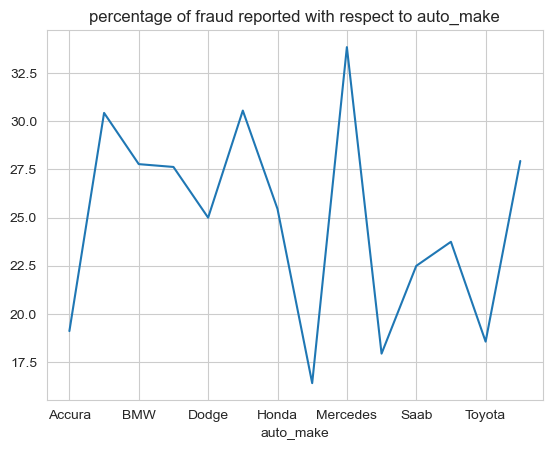

In [148]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to auto_make") 

<Axes: xlabel='auto_make'>

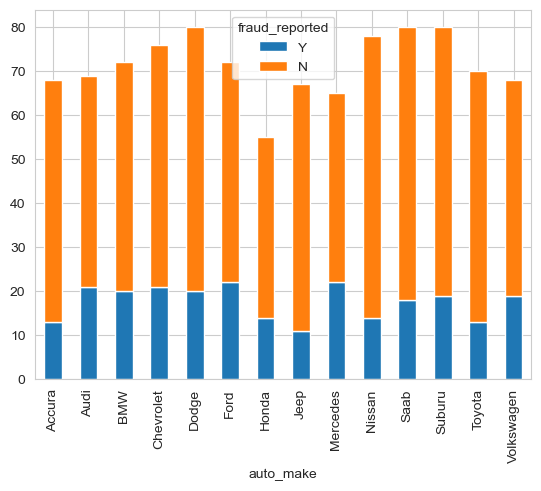

In [149]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more with make 'Suburu','Saab'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is more in case of 'Audi','BMW','Volkswagon','Mercedees','Ford','Chevrolet'.

#### Analysis of fraud_reported with respect to auto_model

In [150]:
df_plot = df.groupby(['fraud_reported','auto_model']).size().reset_index().pivot(columns='fraud_reported', index='auto_model', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported   N   Y  Total  %of fraud reported  %of no fraud reported
auto_model                                                              
3 Series        17   1     18            5.555556              94.444444
92x             20   8     28           28.571429              71.428571
93              20   5     25           20.000000              80.000000
95              22   5     27           18.518519              81.481481
A3              27  10     37           27.027027              72.972973
A5              21  11     32           34.375000              65.625000
Accord          10   3     13           23.076923              76.923077
C300            11   7     18           38.888889              61.111111
CRV             17   3     20           15.000000              85.000000
Camry           24   4     28           14.285714              85.714286
Civic           14   8     22           36.363636              63.636364
Corolla         17   3     20           15.000000              85.000000
E400            20   7     27           25.925926              74.074074
Escape          18   6     24           25.000000              75.000000
F150            17  10     27           37.037037              62.962963
Forrestor       20   8     28           28.571429              71.428571
Fusion          15   6     21           28.571429              71.428571
Grand Cherokee  19   6     25           24.000000              76.000000
Highlander      16   6     22           27.272727              72.727273
Impreza         14   6     20           30.000000              70.000000
Jetta           25  10     35           28.571429              71.428571
Legacy          27   5     32           15.625000              84.375000
M5              10   5     15           33.333333              66.666667
MDX             28   8     36           22.222222              77.777778
ML350           12   8     20           40.000000              60.000000
Malibu          27   3     30           10.000000              90.000000
Maxima          17   7     24           29.166667              70.833333
Neon            31   6     37           16.216216              83.783784
Passat          24   9     33           27.272727              72.727273
Pathfinder      27   4     31           12.903226              87.096774
RAM             29  14     43           32.558140              67.441860
RSX             11   1     12            8.333333              91.666667
Silverado       13   9     22           40.909091              59.090909
TL              16   4     20           20.000000              80.000000
Tahoe           15   9     24           37.500000              62.500000
Ultima          20   3     23           13.043478              86.956522
Wrangler        37   5     42           11.904762              88.095238
X5              16   7     23           30.434783              69.565217
X6               9   7     16           43.750000              56.250000

Text(0.5, 1.0, 'percentage of fraud reported with respect to auto_model')

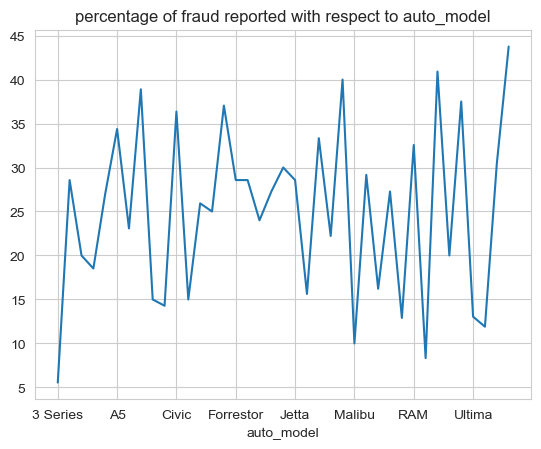

In [151]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to auto_model") 

<Axes: xlabel='auto_model'>

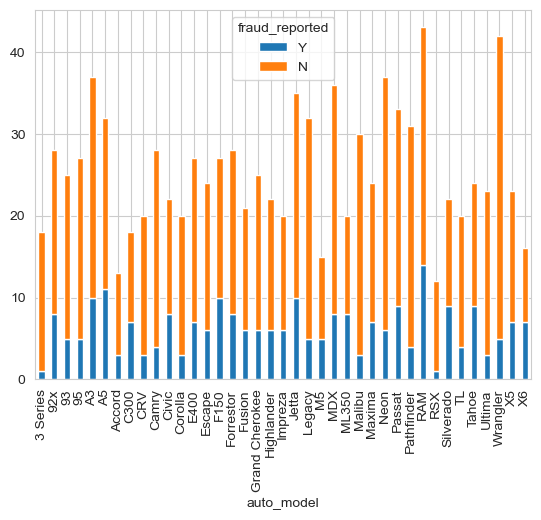

In [152]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed morefor model 'Wragler'.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is more in 'ML350'.

#### Analysis of fraud_reported with respect to auto_year

In [153]:
df_plot = df.groupby(['fraud_reported','auto_year']).size().reset_index().pivot(columns='fraud_reported', index='auto_year', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported   N   Y  Total  %of fraud reported  %of no fraud reported
auto_year                                                               
1995            43  13     56           23.214286              76.785714
1996            23  14     37           37.837838              62.162162
1997            34  12     46           26.086957              73.913043
1998            33   7     40           17.500000              82.500000
1999            45  10     55           18.181818              81.818182
2000            31  11     42           26.190476              73.809524
2001            33   9     42           21.428571              78.571429
2002            39  10     49           20.408163              79.591837
2003            42   9     51           17.647059              82.352941
2004            23  16     39           41.025641              58.974359
2005            42  12     54           22.222222              77.777778
2006            39  14     53           26.415094              73.584906
2007            34  18     52           34.615385              65.384615
2008            35  10     45           22.222222              77.777778
2009            39  11     50           22.000000              78.000000
2010            43   7     50           14.000000              86.000000
2011            36  17     53           32.075472              67.924528
2012            37   9     46           19.565217              80.434783
2013            34  15     49           30.612245              69.387755
2014            32  12     44           27.272727              72.727273
2015            36  11     47           23.404255              76.595745

Text(0.5, 1.0, 'percentage of fraud reported with respect to year')

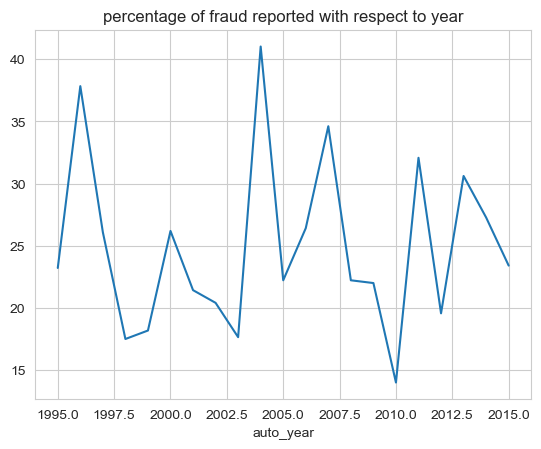

In [154]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to year") 

<Axes: xlabel='auto_year'>

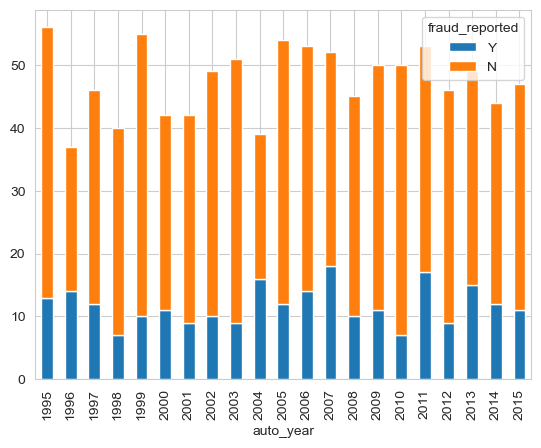

In [155]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more in the year of 1995.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is high in the year 2005.

#### Analysis of fraud_reported with respect to Age

In [156]:
# Define the bins and corresponding labels
bins = [10,20, 30, 40, 50, 60, 70]
group = ['less 20','20-30', '30-40', '40-50', '50-60', 'Above 60']

# Create a DataFrame with the 'age' column

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['age_bin'] = pd.cut(df['age'], bins, labels=group)

df_plot = df.groupby(['fraud_reported','age_bin']).size().reset_index().pivot(columns='fraud_reported', index='age_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported    N   Y  Total  %of fraud reported  %of no fraud reported
age_bin                                                                  
less 20           1   1      2           50.000000              50.000000
20-30           150  45    195           23.076923              76.923077
30-40           302  94    396           23.737374              76.262626
40-50           221  72    293           24.573379              75.426621
50-60            66  30     96           31.250000              68.750000
Above 60         13   5     18           27.777778              72.222222

Text(0.5, 1.0, 'percentage of fraud reported with respect to age_bin')

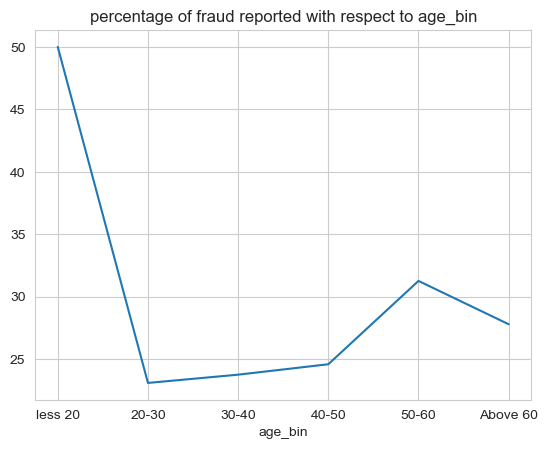

In [157]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to age_bin") 

<Axes: xlabel='age_bin'>

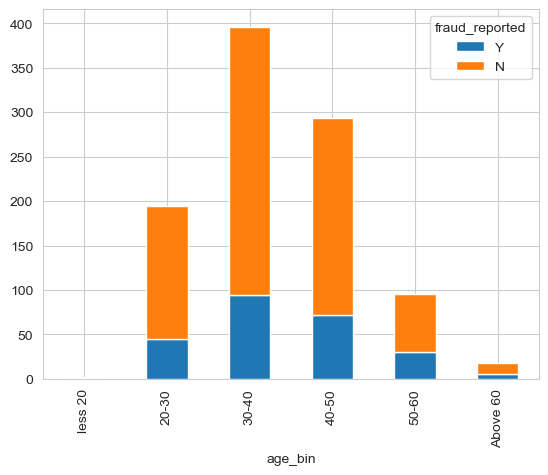

In [158]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more with insured_age_bin 30-40 and very less in less 20.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is high in less 20,50-60 and above 60.

#### Analysis of fraud_reported with respect to policy_annual_premium

In [159]:
# Define the bins and corresponding labels
bins = [0,500, 1000, 1500, 2000, 2500]
group = ['less 500','500-1000', '1000-1500', '1500-2000', 'above 2000']

# Create a DataFrame with the 'age' column

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['policy_annual_premium_bin'] = pd.cut(df['policy_annual_premium'], bins, labels=group)

df_plot = df.groupby(['fraud_reported','policy_annual_premium_bin']).size().reset_index().pivot(columns='fraud_reported', index='policy_annual_premium_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported               N    Y  Total  %of fraud reported  \
policy_annual_premium_bin                                        
less 500                     1    1      2           50.000000   
500-1000                   107   44    151           29.139073   
1000-1500                  529  164    693           23.665224   
1500-2000                  115   38    153           24.836601   
above 2000                   1    0      1            0.000000   

fraud_reported             %of no fraud reported  
policy_annual_premium_bin                         
less 500                               50.000000  
500-1000                               70.860927  
1000-1500                              76.334776  
1500-2000                              75.163399  
above 2000                            100.000000

Text(0.5, 1.0, 'percentage of fraud reported with respect to anual_premium_bin')

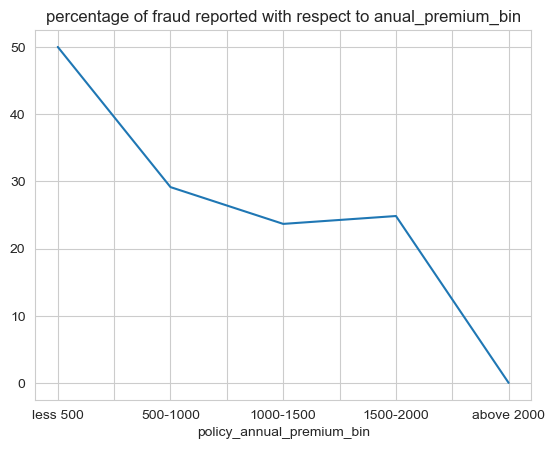

In [160]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to anual_premium_bin") 

<Axes: xlabel='policy_annual_premium_bin'>

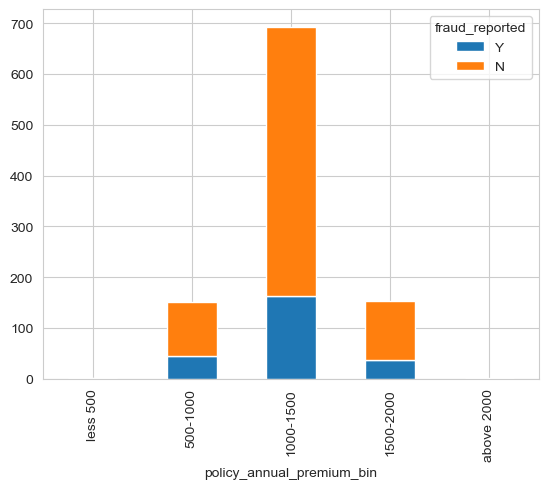

In [161]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more with total_premium_amount 1000-1500 and less in less than 500.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is high in less than 500 ,others are almost same and above 2000 is zero.

#### Analysis of fraud_reported with respect to capital-gains

In [162]:
# Define the bins and corresponding labels
bins = [0,25000, 50000, 75000, 100000, 125000]
group = ['low','midium', 'above medium', 'high', 'very high']

# Create a DataFrame with the 'age' column

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['capital-gains_bin'] = pd.cut(df['capital-gains'], bins, labels=group)
df['capital-gains_bin'] = df['capital-gains_bin'].fillna('low')

df_plot = df.groupby(['fraud_reported','capital-gains_bin']).size().reset_index().pivot(columns='fraud_reported', index='capital-gains_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported       N    Y  Total  %of fraud reported  %of no fraud reported
capital-gains_bin                                                            
low                396  136    532           25.563910              74.436090
midium             157   52    209           24.880383              75.119617
above medium       178   49    227           21.585903              78.414097
high                21   10     31           32.258065              67.741935
very high            1    0      1            0.000000             100.000000

Text(0.5, 1.0, 'percentage of fraud reported with respect to capital-gains_bin')

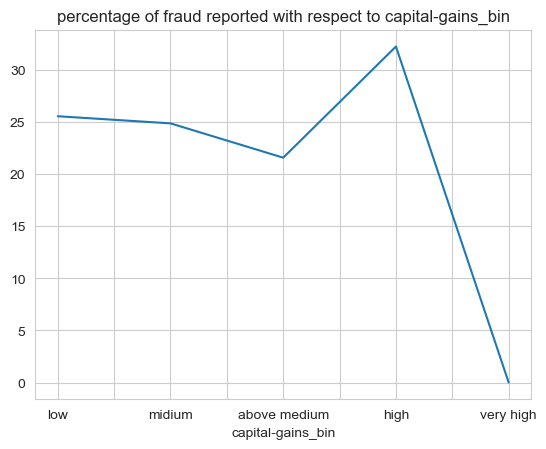

In [163]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to capital-gains_bin") 

<Axes: xlabel='capital-gains_bin'>

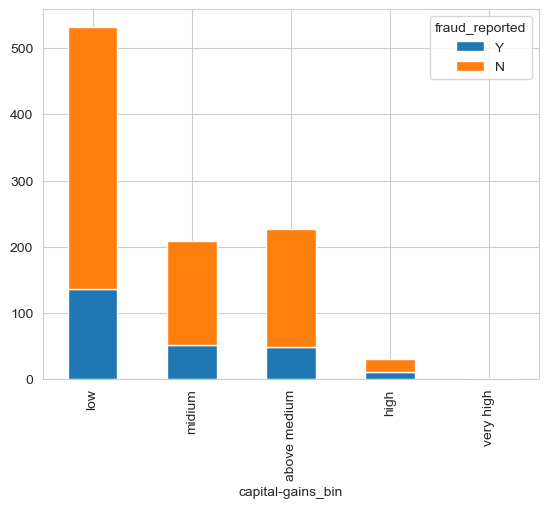

In [164]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more with low capital gain.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is high in high capital gain .

#### Analysis of fraud_reported with respect to capital-loss

In [165]:
#Define the bins and corresponding labels
bins = [-125000,-100000,-75000,-50000,-25000,0]
group = ['very high','high', 'above medium', 'medium', 'low']

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['capital-loss_bin'] = pd.cut(df['capital-loss'], bins, labels=group)

df_plot = df.groupby(['fraud_reported','capital-loss_bin']).size().reset_index().pivot(columns='fraud_reported', index='capital-loss_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported      N    Y  Total  %of fraud reported  %of no fraud reported
capital-loss_bin                                                            
very high           1    0      1            0.000000             100.000000
high               30    6     36           16.666667              83.333333
above medium      173   63    236           26.694915              73.305085
medium            163   59    222           26.576577              73.423423
low               386  119    505           23.564356              76.435644

Text(0.5, 1.0, 'percentage of fraud reported with respect to capital_loss_bin')

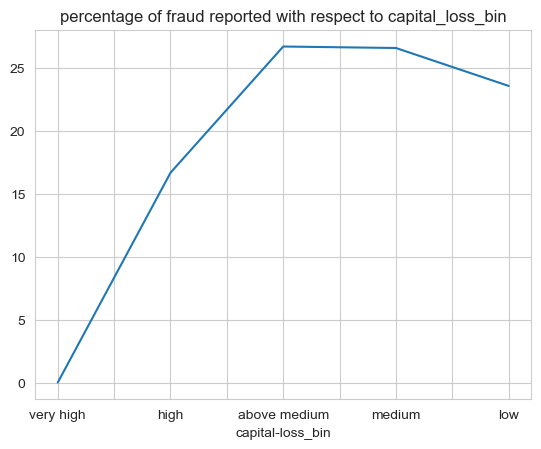

In [166]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to capital_loss_bin") 

<Axes: xlabel='capital-loss_bin'>

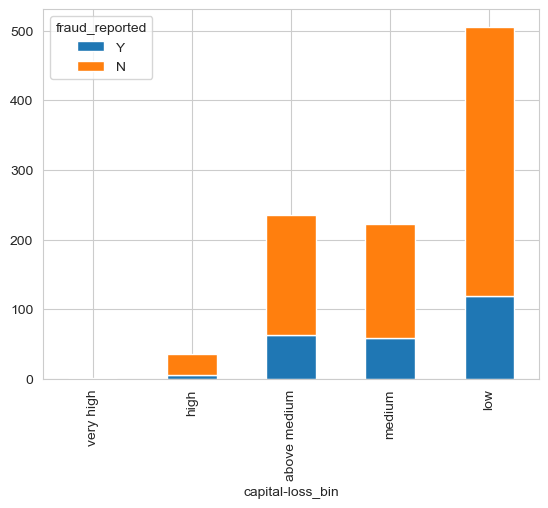

In [167]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more with low capital loss.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is high in above medium  capital loss .

#### Analysis of fraud_reported with respect to incident_hour_of_the_day

In [168]:
#Define the bins and corresponding labels
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
group = ["midnight", "early_morning", "morning", 'before-noon', 'afternoon', 'evening', 'night']

# Create a DataFrame with the 'age' column

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['incident_hour_of_the_day_bin'] = pd.cut(df['incident_hour_of_the_day'], bins, labels=group)

df_plot = df.groupby(['fraud_reported','incident_hour_of_the_day_bin']).size().reset_index().pivot(columns='fraud_reported', index='incident_hour_of_the_day_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported                  N   Y  Total  %of fraud reported  \
incident_hour_of_the_day_bin                                       
midnight                      123  42    165           25.454545   
early_morning                  92  31    123           25.203252   
morning                       101  18    119           15.126050   
before-noon                    81  35    116           30.172414   
afternoon                     171  60    231           25.974026   
evening                        83  32    115           27.826087   
night                         102  29    131           22.137405   

fraud_reported                %of no fraud reported  
incident_hour_of_the_day_bin                         
midnight                                  74.545455  
early_morning                             74.796748  
morning                                   84.873950  
before-noon                               69.827586  
afternoon                                 74.025974  
evening                                   72.173913  
night                                     77.862595

Text(0.5, 1.0, 'percentage of fraud reported with respect to incident_hour_of_the_day_bin')

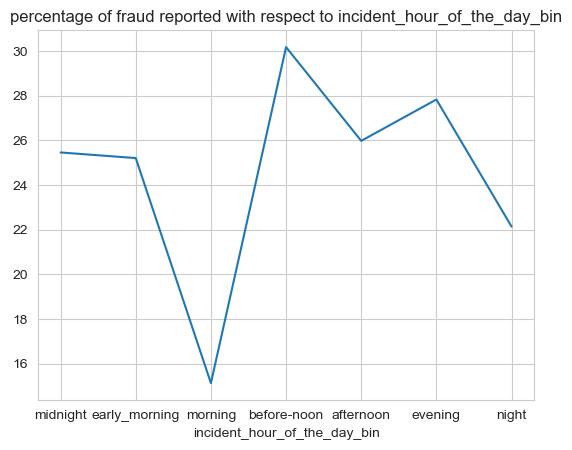

In [169]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to incident_hour_of_the_day_bin") 

<Axes: xlabel='incident_hour_of_the_day_bin'>

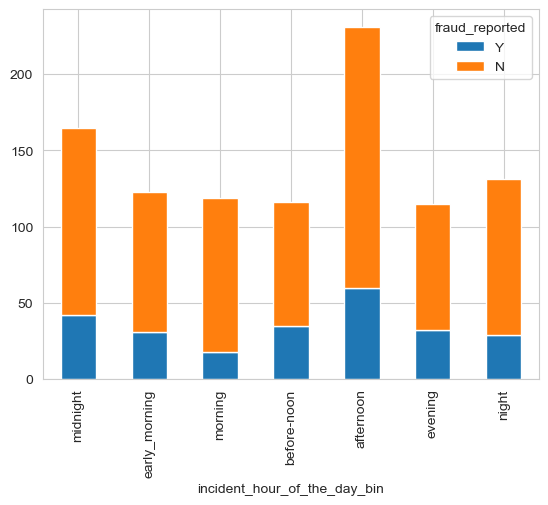

In [170]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

In [171]:
fraud_hour_df = pd.crosstab(index=df['fraud_reported'], columns=[df['incident_hour_of_the_day_bin']])
fraud_hour_df

incident_hour_of_the_day_bin  midnight  early_morning  morning  before-noon  \
fraud_reported                                                                
N                                  123             92      101           81   
Y                                   42             31       18           35   

incident_hour_of_the_day_bin  afternoon  evening  night  
fraud_reported                                           
N                                   171       83    102  
Y                                    60       32     29

In [172]:
def p_prod_given_fraud_reported(fraud_reported, print_marginal=False):
    
    p_midnight= fraud_hour_df['midnight'][fraud_reported] / fraud_hour_df.loc[fraud_reported].sum()
    p_earlymorning = fraud_hour_df['early_morning'][fraud_reported] / fraud_hour_df.loc[fraud_reported].sum()
    p_morning = fraud_hour_df['morning'][fraud_reported] / fraud_hour_df.loc[fraud_reported].sum()
    p_bfnoon= fraud_hour_df['before-noon'][fraud_reported] / fraud_hour_df.loc[fraud_reported].sum()
    p_afnoon = fraud_hour_df['afternoon'][fraud_reported] / fraud_hour_df.loc[fraud_reported].sum()
    p_evening = fraud_hour_df['evening'][fraud_reported] / fraud_hour_df.loc[fraud_reported].sum()
    p_night = fraud_hour_df['night'][fraud_reported] / fraud_hour_df.loc[fraud_reported].sum()
    
    if print_marginal:
        print("Marginal probability for different type of incident_hour_of_the_day_bin are below:")
        print("\n")
        print(f"P(N): {fraud_hour_df.loc['N'].sum()/len(df):.2f}")
        print(f"P(Y): {fraud_hour_df.loc['Y'].sum()/len(df):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of incident_hour_of_the_day_bin in given fraud_reported is {fraud_reported} below:")
    print("\n")
    print(f"P('midnight'|{fraud_reported}): {p_midnight:.2f}")
    print(f"P('early_morning'|{fraud_reported}): {p_earlymorning:.2f}")
    print(f"P('morning'|{fraud_reported}): {p_morning:.2f}")
    print(f"P('before-noon'|{fraud_reported}): {p_bfnoon:.2f}")
    print(f"P('afternoon'|{fraud_reported}): {p_afnoon:.2f}")
    print(f"P('evening'|{fraud_reported}): {p_evening:.2f}")
    print(f"P('night'|{fraud_reported}): {p_night:.2f}")
    
p_prod_given_fraud_reported('Y')
p_prod_given_fraud_reported('N')



Conditional probability for different type of incident_hour_of_the_day_bin in given fraud_reported is Y below:


P('midnight'|Y): 0.17
P('early_morning'|Y): 0.13
P('morning'|Y): 0.07
P('before-noon'|Y): 0.14
P('afternoon'|Y): 0.24
P('evening'|Y): 0.13
P('night'|Y): 0.12


Conditional probability for different type of incident_hour_of_the_day_bin in given fraud_reported is N below:


P('midnight'|N): 0.16
P('early_morning'|N): 0.12
P('morning'|N): 0.13
P('before-noon'|N): 0.11
P('afternoon'|N): 0.23
P('evening'|N): 0.11
P('night'|N): 0.14


** Observation **
- Insurance claimed more for incident occure in the afternoon.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is high in the incident occure at before noon .

#### Analysis of fraud_reported with respect to total_claim_amount

In [173]:
# Define the bins and corresponding labels
bins = [0,25000, 50000, 75000, 100000, 125000]
group = ['low','medium', 'above medium', 'high', 'very high']

# Create a DataFrame with the 'age' column

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['total_claim_amount_bin'] = pd.cut(df['total_claim_amount'], bins, labels=group)

df_plot = df.groupby(['fraud_reported','total_claim_amount_bin']).size().reset_index().pivot(columns='fraud_reported', index='total_claim_amount_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported            N    Y  Total  %of fraud reported  \
total_claim_amount_bin                                        
low                     165   17    182            9.340659   
medium                  125   35    160           21.875000   
above medium            323  144    467           30.835118   
high                    130   48    178           26.966292   
very high                10    3     13           23.076923   

fraud_reported          %of no fraud reported  
total_claim_amount_bin                         
low                                 90.659341  
medium                              78.125000  
above medium                        69.164882  
high                                73.033708  
very high                           76.923077

Text(0.5, 1.0, 'percentage of fraud reported with respect to total_claim_amount_bin')

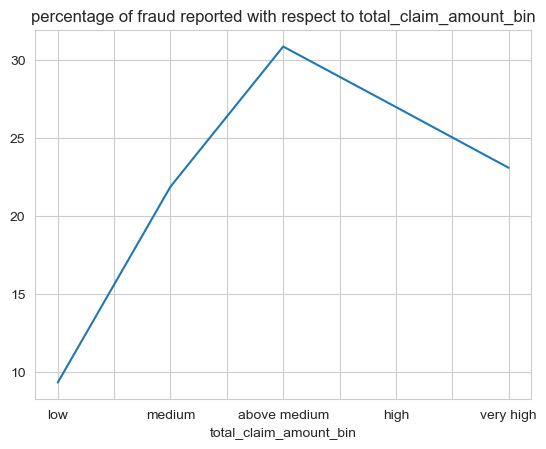

In [174]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to total_claim_amount_bin") 

<Axes: xlabel='total_claim_amount_bin'>

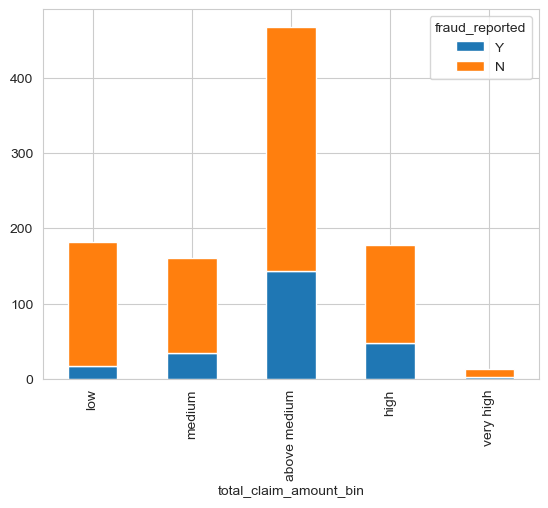

In [175]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

In [176]:
fraud_tot_claim_df = pd.crosstab(index=df['fraud_reported'], columns=[df['total_claim_amount_bin']])
fraud_tot_claim_df

total_claim_amount_bin  low  medium  above medium  high  very high
fraud_reported                                                    
N                       165     125           323   130         10
Y                        17      35           144    48          3

In [177]:
def p_prod_given_fraud_reported(fraud_reported, print_marginal=False):
    
    p_low= fraud_tot_claim_df['low'][fraud_reported] / fraud_tot_claim_df.loc[fraud_reported].sum()
    p_medium = fraud_tot_claim_df['medium'][fraud_reported] / fraud_tot_claim_df.loc[fraud_reported].sum()
    p_amedium = fraud_tot_claim_df['above medium'][fraud_reported] / fraud_tot_claim_df.loc[fraud_reported].sum()
    p_high= fraud_tot_claim_df['high'][fraud_reported] / fraud_tot_claim_df.loc[fraud_reported].sum()
    p_vhigh = fraud_tot_claim_df['very high'][fraud_reported] / fraud_tot_claim_df.loc[fraud_reported].sum()
    
    if print_marginal:
        print("Marginal probability for different type of total claim aamount bin are below:")
        print("\n")
        print(f"P(N): {fraud_hour_df.loc['N'].sum()/len(df):.2f}")
        print(f"P(Y): {fraud_hour_df.loc['Y'].sum()/len(df):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of total claim aamount bin in given fraud_reported is {fraud_reported} below:")
    print("\n")
    print(f"P('low'|{fraud_reported}): {p_low:.2f}")
    print(f"P('medium'|{fraud_reported}): {p_medium:.2f}")
    print(f"P('above medium'|{fraud_reported}): {p_amedium:.2f}")
    print(f"P('high'|{fraud_reported}): {p_high:.2f}")
    print(f"P('very high'|{fraud_reported}): {p_high:.2f}")
    
p_prod_given_fraud_reported('Y')
p_prod_given_fraud_reported('N')



Conditional probability for different type of total claim aamount bin in given fraud_reported is Y below:


P('low'|Y): 0.07
P('medium'|Y): 0.14
P('above medium'|Y): 0.58
P('high'|Y): 0.19
P('very high'|Y): 0.19


Conditional probability for different type of total claim aamount bin in given fraud_reported is N below:


P('low'|N): 0.22
P('medium'|N): 0.17
P('above medium'|N): 0.43
P('high'|N): 0.17
P('very high'|N): 0.17


** Observation **
- Insurance claimed more for total claim amount above medium.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is high in total claim amount above medium .

#### Analysis of fraud_reported with respect to injury_claim

In [178]:
# Define the bins and corresponding labels
bins = [0,5000, 10000, 15000, 20000, 25000]
group = ['less 5000','5000-10000', '10000-15000', '15000-20000', 'above 20000']
# Create a DataFrame with the 'age' column

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['injury_claim_bin'] = pd.cut(df['injury_claim'], bins, labels=group)
df['injury_claim_bin'] = df['injury_claim_bin'].fillna('less 5000')
df_plot = df.groupby(['fraud_reported','injury_claim_bin']).size().reset_index().pivot(columns='fraud_reported', index='injury_claim_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported      N    Y  Total  %of fraud reported  %of no fraud reported
injury_claim_bin                                                            
less 5000         244   52    296           17.567568              82.432432
5000-10000        288  111    399           27.819549              72.180451
10000-15000       165   64    229           27.947598              72.052402
15000-20000        54   19     73           26.027397              73.972603
above 20000         2    1      3           33.333333              66.666667

Text(0.5, 1.0, 'percentage of fraud reported with respect to injury_claim_bin')

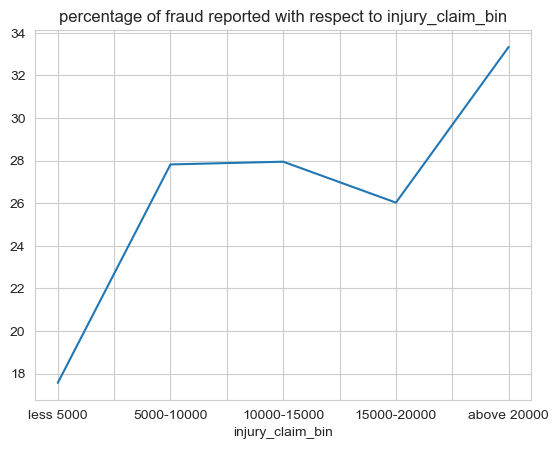

In [179]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to injury_claim_bin") 

<Axes: xlabel='injury_claim_bin'>

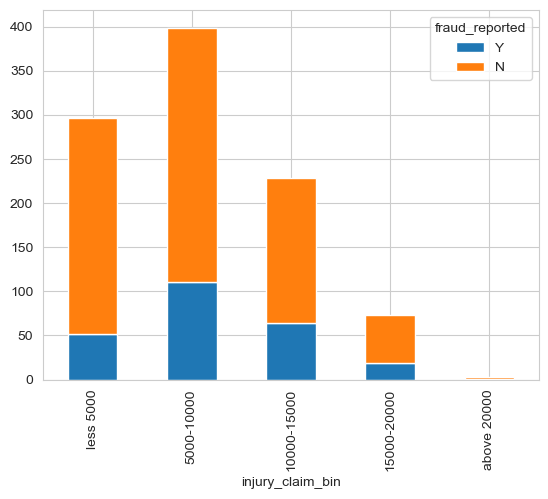

In [180]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more for injury claim between 5000-10000.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is significant in every category  .

#### Analysis of fraud_reported with respect to property_claim

In [181]:
# Define the bins and corresponding labels
bins = [0,5000, 10000, 15000, 20000, 25000]
group = ['less 5000','5000-10000', '10000-15000', '15000-20000', 'above 20000']

# Create a DataFrame with the 'age' column

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['property_claim_bin'] = pd.cut(df['property_claim'], bins, labels=group)
df['property_claim_bin'] = df['property_claim_bin'].fillna('less 5000')

df_plot = df.groupby(['fraud_reported','property_claim_bin']).size().reset_index().pivot(columns='fraud_reported', index='property_claim_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported        N    Y  Total  %of fraud reported  %of no fraud reported
property_claim_bin                                                            
less 5000           252   41    293           13.993174              86.006826
5000-10000          291  121    412           29.368932              70.631068
10000-15000         163   62    225           27.555556              72.444444
15000-20000          42   20     62           32.258065              67.741935
above 20000           5    3      8           37.500000              62.500000

Text(0.5, 1.0, 'percentage of fraud reported with respect to property_claim_bin')

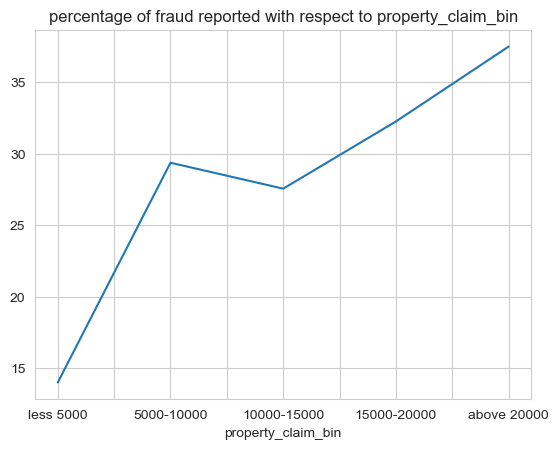

In [182]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to property_claim_bin") 

<Axes: xlabel='property_claim_bin'>

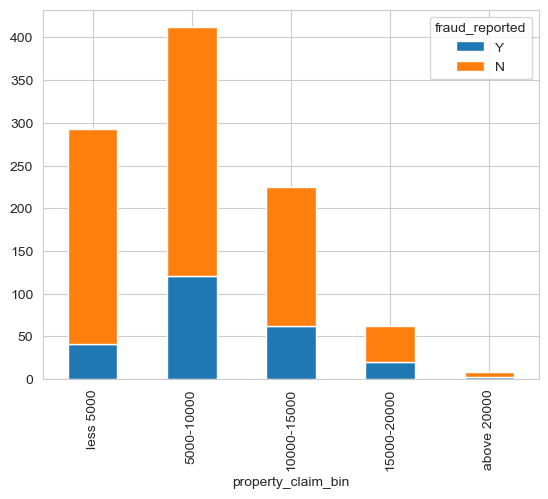

In [183]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more for property claim between 5000-10000.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is significant in every category .

#### Analysis of fraud_reported with respect to vehicle_claim

In [184]:
# Define the bins and corresponding labels
bins = [0,25000, 50000, 75000, 100000, 125000]
group = ['less 500','500-1000', '1000-1500', '1500-2000', 'above 2000']

# Create a DataFrame with the 'age' column

# Create a new column 'age_bin' by categorizing 'age' using the defined bins and labels
df['vehicle_claim_bin'] = pd.cut(df['vehicle_claim'], bins, labels=group)

df_plot = df.groupby(['fraud_reported','vehicle_claim_bin']).size().reset_index().pivot(columns='fraud_reported', index='vehicle_claim_bin', values=0)
df_plot['Total']= df_plot['N']+df_plot['Y']
df_plot['%of fraud reported'] = (df_plot['Y']/ df_plot['Total'])*100
df_plot['%of no fraud reported'] = (df_plot['N']/ df_plot['Total'])*100
df_plot

fraud_reported       N    Y  Total  %of fraud reported  %of no fraud reported
vehicle_claim_bin                                                            
less 500           184   19    203            9.359606              90.640394
500-1000           382  147    529           27.788280              72.211720
1000-1500          183   77    260           29.615385              70.384615
1500-2000            4    4      8           50.000000              50.000000
above 2000           0    0      0                 NaN                    NaN

Text(0.5, 1.0, 'percentage of fraud reported with respect to veichle_claim_bin')

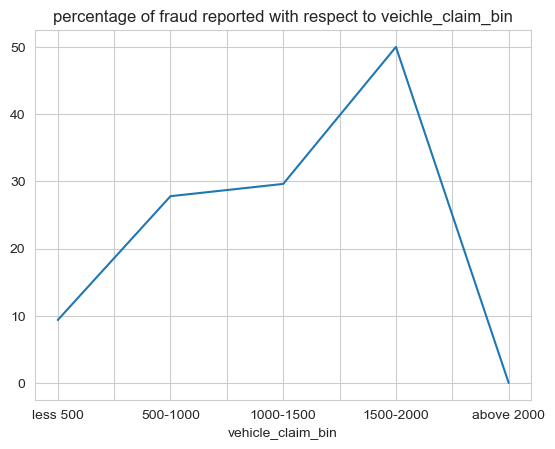

In [185]:
df_plot['%of fraud reported'].plot(kind='line', stacked=True)
plt.title(F"percentage of fraud reported with respect to veichle_claim_bin") 

<Axes: xlabel='vehicle_claim_bin'>

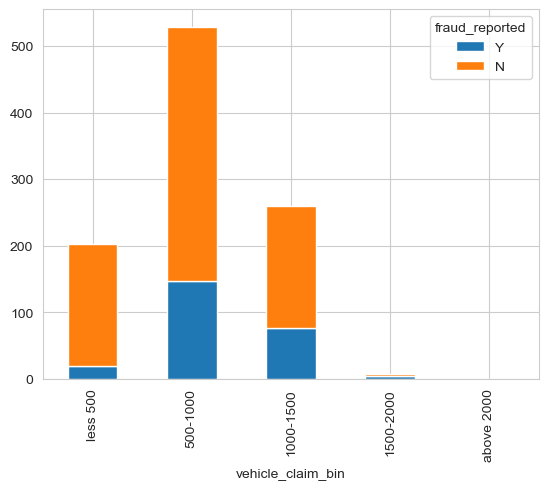

In [186]:
df_plot=df_plot[['Y','N']]
df_plot.plot(kind='bar', stacked=True)

** Observation **
- Insurance claimed more for veichle claim between 500-1000.
- percentage of no fraud reported is higher in each case.
- percentage of fraud reported is significant in every category except above 2000 .

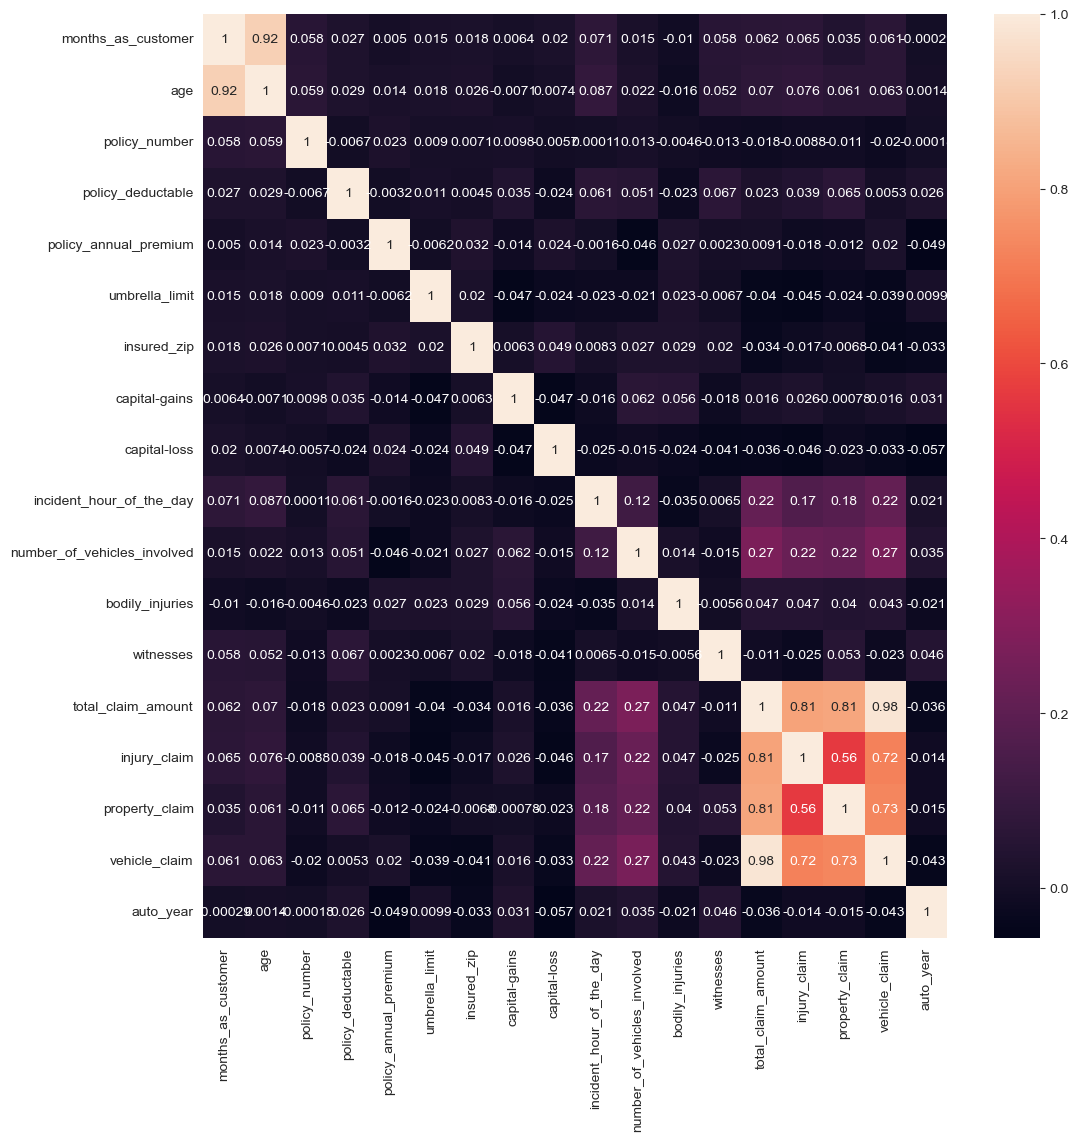

In [187]:
plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(),annot=True) 
plt.show()

** Obsevation **
- Total claim amout is highly related with veicle claim, injury claim , property claim.
- injury claim , veicle claim and property claim are corelated to each other.

* The Columns vehicle claim, injury claim and property claim can be dropped


In [189]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... fraud_reported age_bin policy_annual_premium_bin  \
0       466132  ...              Y   40-50                 1000-1500   
1       468176  ...              Y   40-50                 1000-1500   
2       430632  ...              N   20-30                 1000-1500   
3       608117  ...              Y   40-50                 1000-1500   
4       610706  ...              N   40-50                 1500-2000   

  capital-gains_bin capital-loss_bin  incident_hour_of_the_day_bin  \
0      above medium              low                 early_morning   
1               low              low                       morning   
2            midium              low                       morning   
3            midium     above medium                 early_morning   
4      above medium           medium                       evening   

   total_claim_amount_bin injury_claim_bin property_claim_bin  \
0            above medium       5000-10000        10000-15000   
1                     low        less 5000          less 5000   
2                  medium       5000-10000          less 5000   
3            above medium       5000-10000         5000-10000   
4                     low        less 5000          less 5000   

  vehicle_claim_bin  
0         1000-1500  
1          less 500  
2          less 500  
3         1000-1500  
4          less 500  

[5 rows x 48 columns]

In [190]:
# Save the DataFrame to a CSV file
df.to_csv('insurance_claims_EDA.csv', index=False)